<div class="alert alert-info">
<h2> Анализ продаж компьютерных игр Интернет-магазина <a class="tocSkip"></h2>
    
<b>Цель:</b>  выявить закономерности успешности игры для возможности сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

<b>Задача:</b> поиск интересных особенностей и зависимостей, которые существуют в индустрии игр.

<b>Датасет для анализа:</b>  исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016г..
    
<b>Содержание</b>
   1. Предобработка данных;
   2. Исследовательский анализ данных;
   3. Портрет пользователя по странам;
   4. Проверка гипотезы;
   5. Общие выводы.</div>

## Предобработка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import plotly.io as pio
from plotly import graph_objects as go 
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
games = pd.read_csv('/datasets/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Замена названий столбцов

In [4]:
games.columns = games.columns.str.lower()
# для начала привела название всех столбцов к нижнем регистру
games.head() 
# отобрала 3 названия столбца, где есть аббервиатуры стран

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
games = games.rename(columns={'na_sales':'NA_sales', 'eu_sales':'EU_sales','jp_sales':'JP_sales'})
# в отобранных столбцах аббервиатура названия стран приведен верхнему регистру
games.head()

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Результат:** Название столбцов были приведены к нижнему регистру, кроме трех столбцов (NA_sales, EU_sales, JP_sales) поскольку являются аббревиатурами стран

### Преобразование данных в нужные типы и обработка пропусков


In [6]:
# проверка пропусков
games.isna().sum() 

name                  2
platform              0
year_of_release     269
genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
# проверка пропусков в столбце "year_of_release"
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [8]:
# поскольку процент пропусков в столбце года выпуска был небольшой, они были удалены
games = games.dropna(subset = ['year_of_release'])
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

In [9]:
# и приведены к числовому типу
games['year_of_release'] = games['year_of_release'].astype('int')
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating


In [10]:
# проверка уникальныльных данных в столбце "оценка критиков"
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [11]:
# пропуски в столбце "оценка критиков" заменила на -1
games['critic_score'] = games['critic_score'].fillna(-1) 
# после, чтобы убедиться, проверила количество пропущенных значений
print('Количество пропусков:', games['critic_score'].isna().sum())
# провела данные в столбце "оценка критиков" в числовой тип
games['critic_score'] = games['critic_score'].astype('int')
# провела еще раз уникальные данные в столбце "оценка критиков"
games['critic_score'].unique()

Количество пропусков: 0


array([76, -1, 82, 80, 89, 58, 87, 91, 61, 97, 95, 77, 88, 83, 94, 93, 85,
       86, 98, 96, 90, 84, 73, 74, 78, 92, 71, 72, 68, 62, 49, 67, 81, 66,
       56, 79, 70, 59, 64, 75, 60, 63, 69, 50, 25, 42, 44, 55, 48, 57, 29,
       47, 65, 54, 20, 53, 37, 38, 33, 52, 30, 32, 43, 45, 51, 40, 46, 39,
       34, 41, 36, 31, 27, 35, 26, 19, 28, 23, 24, 21, 17, 13])

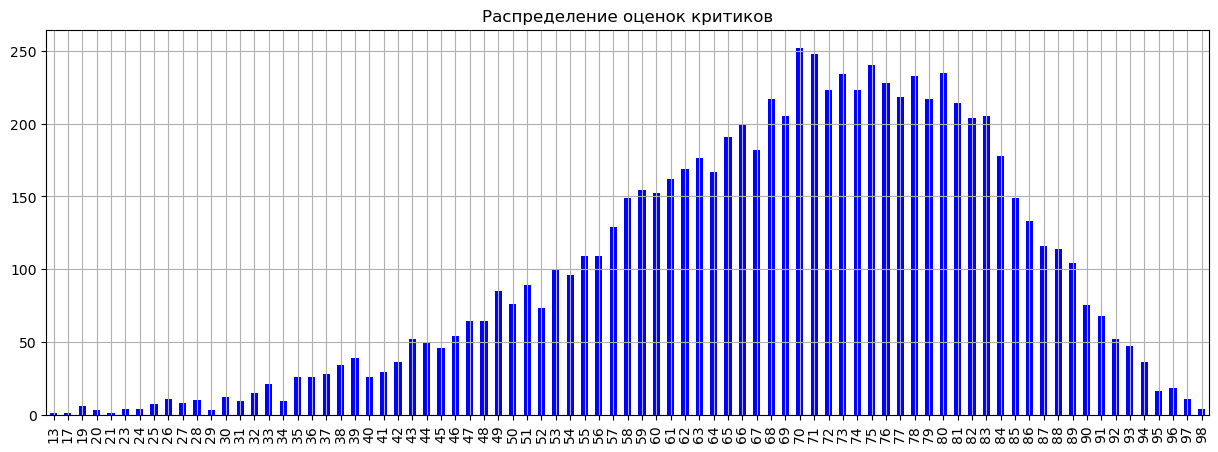

In [12]:
#график распределения оценок критиков без -1
(games[games['critic_score'] != -1]['critic_score']
 .value_counts()
 .sort_index(ascending=True)
 .plot(kind='bar', figsize=(15,5), color ='blue', grid = True)
 .set(title='Распределение оценок критиков'));

In [13]:
# просмотр уникальных оценок пользователей
games['user_score'].unique() 

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [14]:
# просмотр количество уникальных значений в оценках пользователей
games['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [15]:
#поскольку tbd является еще не присвоенным рейтингом, для отличия заменила на -1 
games.loc[games['user_score'] == 'tbd', 'user_score'] =  -1 
#затем заменила тип данных
games['user_score'] = pd.to_numeric(games['user_score'], errors = 'raise') 
#и заменила все nan также на -1
games['user_score'] = games['user_score'].fillna(-1)
# проверка замены
games['user_score'].value_counts() 

-1.0    8983
 7.8     322
 8.0     285
 8.2     276
 8.3     252
        ... 
 1.5       2
 0.3       2
 1.1       2
 0.0       1
 9.7       1
Name: user_score, Length: 96, dtype: int64

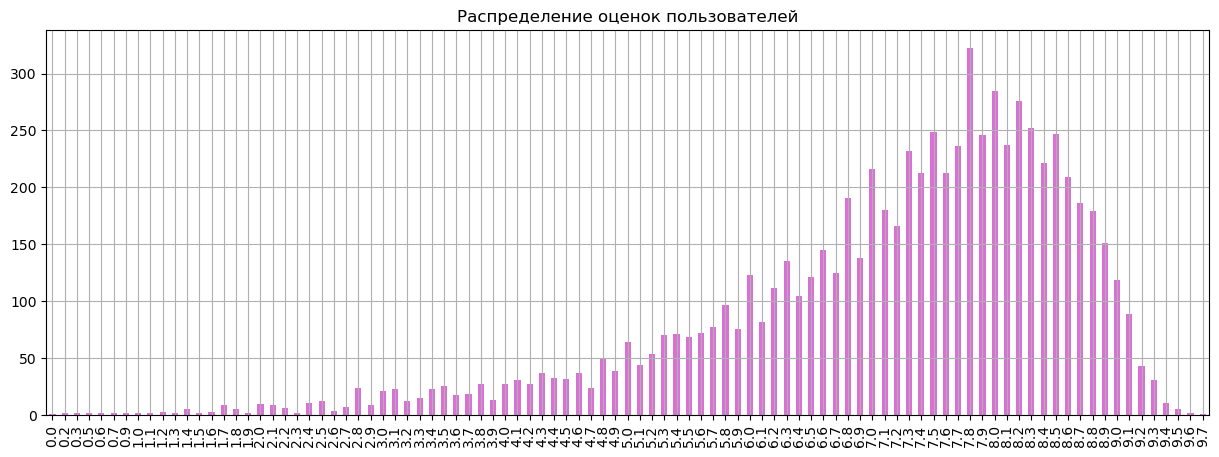

In [16]:
#график распределения оценок пользователей без -1
(games[games['user_score'] != -1]['user_score']
 .value_counts().sort_index(ascending=True)
 .plot(kind='bar', figsize=(15,5), color ='orchid', grid = True)
 .set(title='Распределение оценок пользователей'));

In [17]:
# проверка уникальныльных данных в столбце рейтинг от организации ESRB 
games['rating'].unique()
# проверка пропусков в столбце рейтинг
print('Количество пропусков в данных рейтинга:', games['rating'].isna().sum())

Количество пропусков в данных рейтинга: 6678


In [18]:
# пропуски в столбце рейтинг заменила на без рейтинга
games['rating'] = games['rating'].fillna('no_rating') 
# после, чтобы убедиться, проверила количество пропущенных значений
print('Количество пропусков:', games['rating'].isna().sum())
# проверила замены по уникальным данным в столбце "оценка критиков"
games['rating'].unique()

Количество пропусков: 0


array(['E', 'no_rating', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [19]:
print(games.duplicated().sum()) 
# подсчёт явных дубликатов показал 0

0


In [20]:
# проверка уникальных названий игр
games['name'].nunique ()

11426

In [21]:
#проверка дубликатов в сочетании названия и других значений
games[games.duplicated(subset=['name','platform', 'year_of_release', 'genre'], keep=False)]

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83,5.5,E
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,-1,-1.0,no_rating
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,-1,-1.0,no_rating
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83,5.5,E


In [22]:
#удаление дубликатов в сочетании названия и других значений
games = games.drop_duplicates(subset=['name','platform', 'year_of_release', 'genre'], keep='first', inplace =False)
games[games.duplicated(subset=['name','platform', 'year_of_release', 'genre'], keep=False)]

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating


In [23]:
#проверила стороки nan в name
games[games['name'].isna()]

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.0,0.08,-1,-1.0,no_rating


In [24]:
#удалила стороки nan
games = games.dropna(subset=['name'])
games[games['name'].isna()]

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating


In [25]:
#проверила стороки nan в genre
games[games['genre'].isna()]

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating


In [26]:
#удалила стороки nan
games = games.dropna(subset=['genre'])
games[games['genre'].isna()]

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating


In [27]:
#еще раз проверила все пропуски  
games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
NA_sales           0
EU_sales           0
JP_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [28]:
# проверка того, что осталось
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,' : кол-во 0', temp[temp[col_l] == 0][col_l].count(),
        ', процент 0', round(temp[temp[col_l] == 0][col_l].count()/len(temp)*100, 2),'%')
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   NA_sales         16443 non-null  float64
 5   EU_sales         16443 non-null  float64
 6   JP_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int32  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
dtypes: float64(5), int32(2), object(4)
memory usage: 1.4+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
name  : кол-во 0 0 , процент 0 0.0 %
name : кол

### Cуммарные продажи во всех регионах

In [29]:
#суммировала все продажи по странам в отдельном столбце
games['all_sales'] = games[['NA_sales','EU_sales','JP_sales','other_sales']].sum(axis=1)
games

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,no_rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,no_rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,no_rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,no_rating,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,no_rating,0.01


**Общие выводы по пропускам:** 

- Больше всего пропусков было в столбцах "оценка критиков" (51%), "оценка пользователей" и "рейтинг" (40%).
 - Пропуски в столбце "оценка критиков" были заменены, поскольку не каждая вышедшая на рынок игра отправляется на оценку критике, особенно если это игра от не особо известных производителей. 
 - Все пропуски были заменены на -1 как обозначения, что оценка отсутствует. Среди уникальных данных -1 нету и среди оценок присутствует только целые числовые.

- Cтолбец с пропусками "оценка пользователей" были также заменены, поскольку 40% пропусков является достаточно значительным.
 - Заменить было решено таким значением, который не был представлен среди уже имеющихся. Посколько сложно точно сказать, что оценка зависима от таких данных как сама игра, год, платформы, ставить среднее значение или похожую оценку поставленную другими пользователями не вижу нужным. Среди уникальных значений уже существует 0, поэтому для отличий замена была на -1. 
 - Аббревиатура 'tbd' в столбце с оценкой пользователей являются данными для уточнения (2424). В данном случае было решено заменить их как nan значением -1.

- Поскольку процент пропусков в столбце год выпуска небольшой (2%) они были удалены.  

- Пропуски в столбце "рейтинг" была заменена на категорию - "no_rating" (нету рейтинга), поскольку отсутсвия рейтинга в 40% данных может быть из-за того, что ESBN рейтинг охватывает только США и Канаду. Поэтому пропуски возможны из-за отсутствия в стране данного рейтинга.

- Явные дубликаты не были обнаружены, а неявные дубликаты в сочетании названия игры с другими значениями были обнаружены и удалены.

** Общие вывод по типам данных:** 

- Данные столбцов "год выпуска" и "оценка критиков" были изменены на числовой тип. Поскольку годы не могут быть дробными, а у оценки критиков десятичные были нулевыми, рационально было их перевести в числовой тип.

**Результат:** Продажи в Северной Америке, Европе, Японии и других стран были просуммированы и записаны в новом столбце "all_sales".

## Исследовательский анализ данных

### Выпуск игр по годам

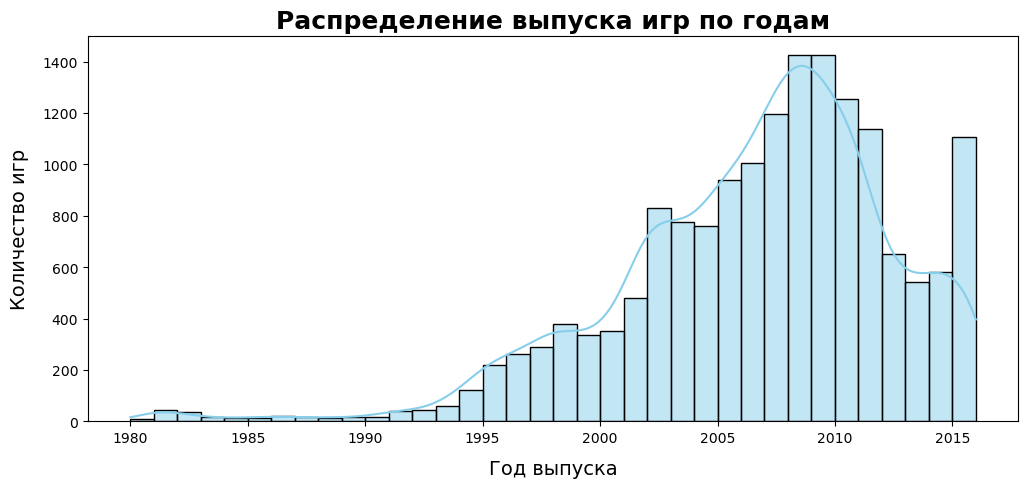

In [30]:
#график данных по годам
fig, ax = plt.subplots(figsize=(12,5))
sns.histplot(games.loc[games['year_of_release'] 
                       & games['year_of_release'] != 0, 'year_of_release'],
                       color='skyblue', label = 'год выпуска', kde = True, bins =36)
plt.title('Распределение выпуска игр по годам', fontsize=18, weight = 'bold')
plt.xlabel('Год выпуска', labelpad=10, weight='normal', size=14)
plt.ylabel('Количество игр', labelpad=10, weight='normal', size=14)
plt.show();

In [31]:
#были подсчитаны данные и их процент по каждому году
games_years = games.pivot_table(index='year_of_release', values ='name', aggfunc = 'count')
games_years ['%'] = (games_years['name']/games_years['name'].sum())*100
games_years

,name,%
year_of_release,,
1980,9,0.054735
1981,46,0.279754
1982,36,0.218938
1983,17,0.103387
1984,14,0.085143
1985,14,0.085143
1986,21,0.127714
1987,16,0.097306
1988,15,0.091224


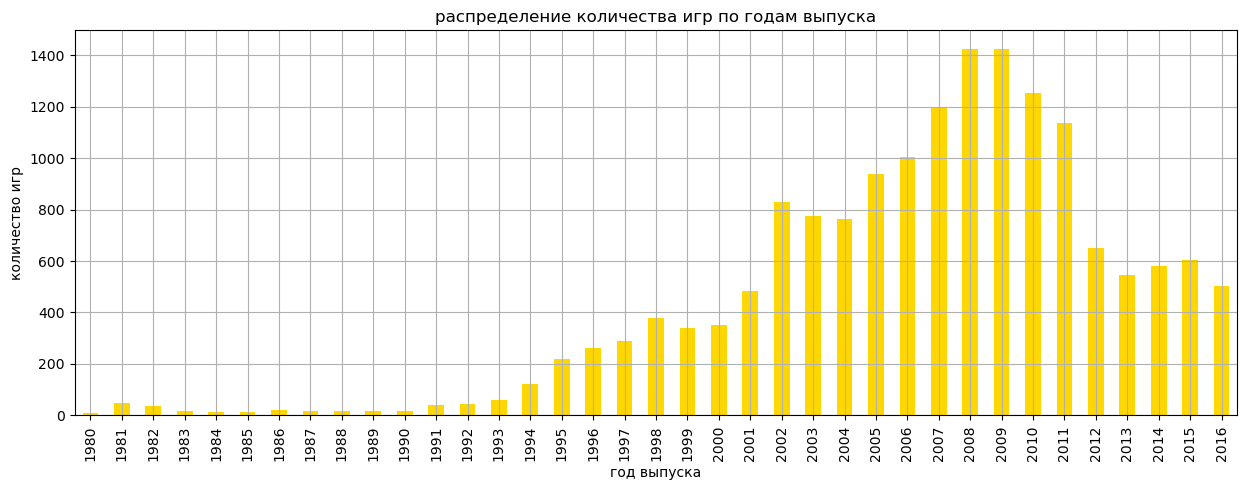

In [32]:
#из полученных данных была построена гистограмма
(games_years['name']
 .plot(kind='bar', figsize=(15,5), color ='gold', grid= True)
 .set(title='распределение количества игр по годам выпуска'));
plt.xlabel("год выпуска")
plt.ylabel("количество игр");

In [33]:
#для анализа были выбраны данные с 1995 г., посольку данные до этого года были не значительными
games_years_relevant = games.loc[games['year_of_release'] >= 1995].reset_index(drop=True)

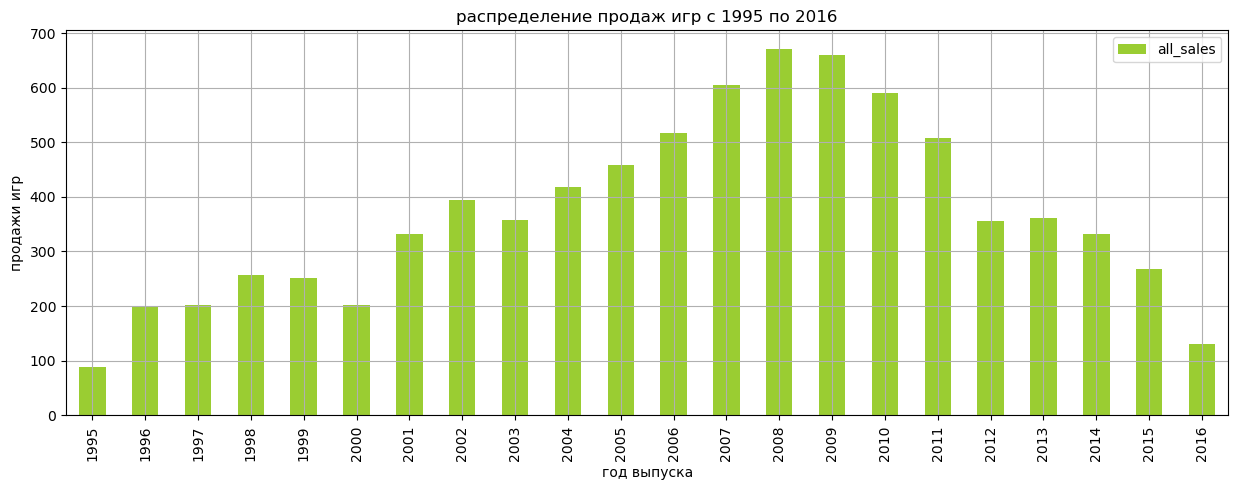

In [34]:
#была построена гистограмма по продажам игр по актуальному периоду
(games_years_relevant
 .pivot_table(index='year_of_release', values ='all_sales', aggfunc = 'sum')
 .plot(kind='bar', figsize=(15,5), color ='yellowgreen', grid = True)
 .set(title='распределение продаж игр с 1995 по 2016'));
plt.xlabel("год выпуска")
plt.ylabel("продажи игр");

In [35]:
#были подсчитаны данные по продажам игр и их процент по каждому актуальному году
games_years_sales = games.pivot_table(index='year_of_release', values ='all_sales', aggfunc = 'sum')
games_years_sales ['%'] = (games_years_sales['all_sales']/games_years_sales['all_sales'].sum())*100
games_years_sales.tail(22)

,all_sales,%
year_of_release,,
1995,88.12,0.999732
1996,199.15,2.259381
1997,201.07,2.281164
1998,256.31,2.907869
1999,251.11,2.848874
2000,201.66,2.287858
2001,331.46,3.760455
2002,394.97,4.480983
2003,357.54,4.056335


**Вывод по выпуск игр в разные годы:**
В данном случае были рассмотрены такие данные как количество выпуска и продажи игр по годам. Данные изначально включали период с 1980г. по 2016г. Однако при выводе результатов данные с 1980г. по 1994г. оказались небольшими для использования их в анализе. Тем самым, период для анализа был выбран с 1995 г. по 2016 г. 
Согласно полученным данным 2008 г. и 2009 г. являются пиком по количеству выпущенных и проданных игр. Резкий спад выпуска и продажи игра замечается с 2012 г.

### Продажи игр по платформам

#### выявление платформы с наибольшими суммарными продажами и построение графика по годам

In [36]:
#были выбраны топ-10 популярных платформ
top_platform = games.groupby('platform').agg({'all_sales':'count'}) \
    .sort_values(by = 'all_sales', ascending = False) \
    .head(10)
top_platform

,all_sales
platform,
PS2,2127
DS,2121
PS3,1305
Wii,1286
X360,1232
PSP,1193
PS,1190
PC,957
GBA,811


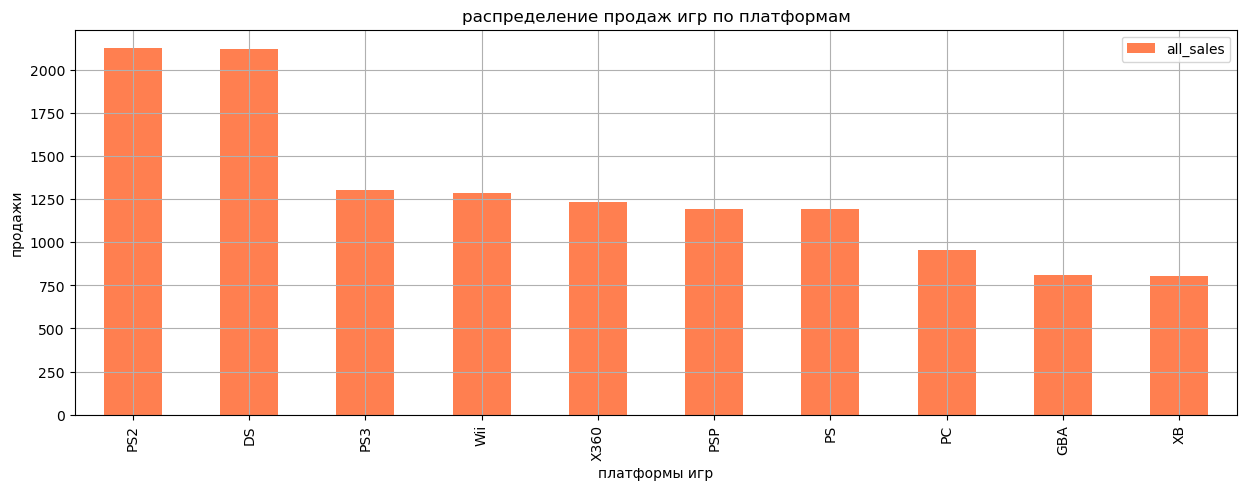

In [37]:
#была построена гистограмма по продажам игр по платформам
(top_platform
 .plot(kind='bar', figsize=(15,5), color ='coral', grid = True)
 .set(title='распределение продаж игр по платформам'))
plt.xlabel("платформы игр")
plt.ylabel("продажи");


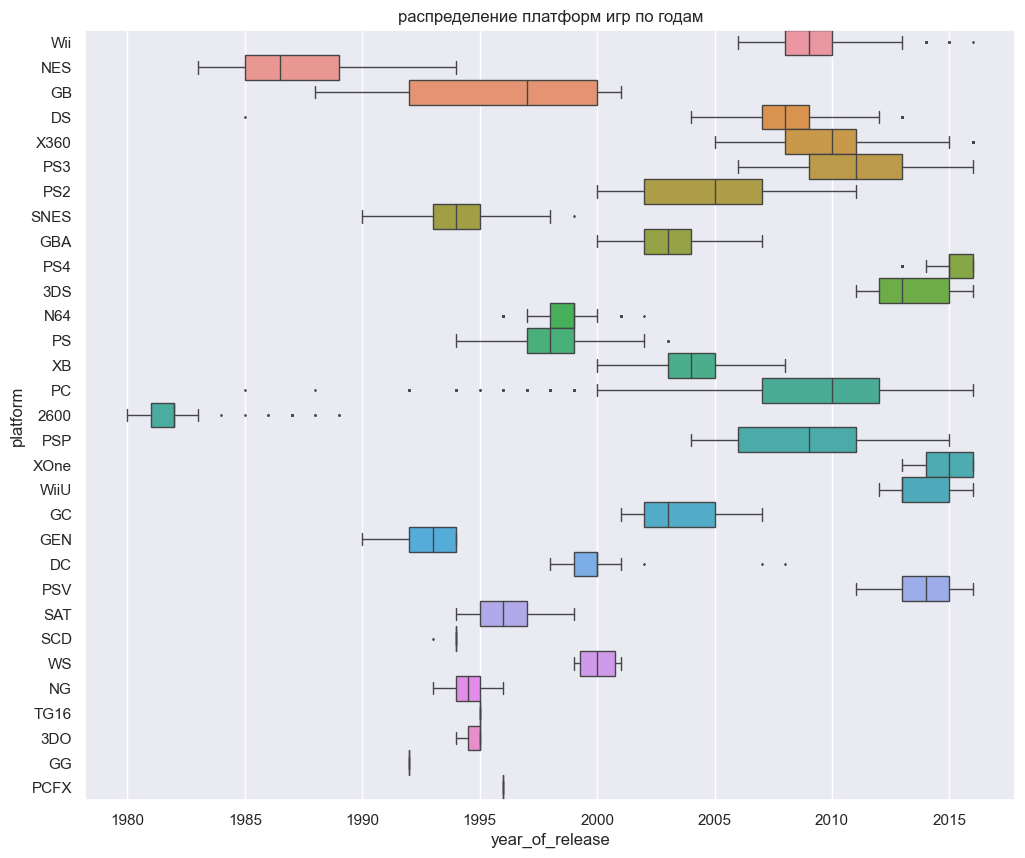

In [38]:
#был построен график boxplot, чтобы увидеть есть ли выбросы по продажам игр топ-10 платформ по годам
sns.set(rc={'figure.figsize':(12,10)})
sns.boxplot(x='year_of_release', 
            y='platform', 
            data=games,width =1, 
            fliersize =1, 
            linewidth =1).set(title='распределение платформ игр по годам');


**Выводы:** Выбросов оказалось не так много, но был найдены артефакт у платформы DS, который показал 1985 год. Однако, платформа DS в 1985 еще не вышла.

In [39]:
#были выведены данные по платформе DS
games.loc[games['platform'] == 'DS','year_of_release'].sort_values()

15957    1985
13463    2004
11517    2004
4421     2004
7902     2004
         ... 
7460     2013
14716    2013
7993     2013
3862     2013
5054     2013
Name: year_of_release, Length: 2121, dtype: int32

In [40]:
#данные по DS за 1985 были удалены,поскольку она еще не вышла в этот год
games_filtered = games.drop(games[(games['platform'] == 'DS') & (games['year_of_release'] == 1985)].index)
games_filtered[games_filtered['platform'] == 'DS'].sort_values(by='year_of_release')

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,all_sales
4421,The Urbz: Sims in the City (all regions sales),DS,2004,Simulation,0.40,0.01,0.02,0.00,-1,-1.0,no_rating,0.43
13095,Tennis no Oji-Sama: 2005 Crystal Drive,DS,2004,Sports,0.00,0.00,0.05,0.00,-1,-1.0,no_rating,0.05
11517,Kenshuui Tendo Dokuta,DS,2004,Simulation,0.00,0.00,0.08,0.00,-1,-1.0,no_rating,0.08
6580,Polarium,DS,2004,Puzzle,0.13,0.01,0.11,0.01,73,8.4,E,0.26
14161,Puyo Pop Fever(us sales),DS,2004,Puzzle,0.03,0.00,0.00,0.00,-1,-1.0,no_rating,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...
9753,Moshi Monsters: Katsuma Unleashed,DS,2013,Action,0.00,0.11,0.00,0.01,-1,-1.0,E,0.12
14353,Turbo: Super Stunt Squad,DS,2013,Sports,0.00,0.03,0.00,0.00,-1,-1.0,E,0.03
7460,Disney's Planes,DS,2013,Simulation,0.11,0.08,0.00,0.02,-1,-1.0,E,0.21
14716,LEGO Legends of Chima: Laval's Journey,DS,2013,Adventure,0.00,0.03,0.00,0.00,-1,-1.0,E10+,0.03


In [41]:
#проверила годы выхода платформы DC (Dreamcast).
games.loc[games['platform'] == 'DC','year_of_release'].sort_values()

643      1998
9055     1998
11380    1998
12297    1998
12507    1998
5145     1998
6426     1998
4665     1999
10657    1999
13255    1999
11241    1999
8306     1999
1679     1999
3815     1999
1712     1999
10522    1999
10535    1999
5693     1999
5350     1999
5240     1999
6964     1999
12302    2000
11538    2000
11311    2000
13109    2000
10998    2000
10685    2000
12850    2000
11927    2000
9165     2000
9558     2000
14054    2000
9077     2000
8103     2000
966      2000
7642     2000
7520     2000
10362    2000
7230     2000
1787     2000
1877     2000
9844     2001
13931    2001
13282    2001
12095    2001
7977     2001
8904     2001
9661     2001
5514     2001
6041     2002
15997    2007
14006    2008
Name: year_of_release, dtype: int32

In [42]:
#DC завершил поддержку в 2001, данные после этого года были удалены
games_filtered_DC = games.drop(games[(games['platform'] == 'DC') & (games['year_of_release'] > 2001)].index)
games_filtered_DC[games_filtered_DC['platform'] == 'DC'].sort_values(by='year_of_release')

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,all_sales
643,Sonic Adventure,DC,1998,Platform,1.26,0.61,0.46,0.08,-1,-1.0,no_rating,2.41
9055,Power Stone,DC,1998,Fighting,0.00,0.00,0.14,0.00,-1,-1.0,no_rating,0.14
11380,Godzilla Generations,DC,1998,Action,0.00,0.00,0.08,0.00,-1,-1.0,no_rating,0.08
12297,July,DC,1998,Adventure,0.00,0.00,0.06,0.00,-1,-1.0,no_rating,0.06
5145,Virtua Fighter 3tb,DC,1998,Fighting,0.00,0.00,0.37,0.00,-1,-1.0,no_rating,0.37
6426,The House of the Dead 2,DC,1998,Shooter,0.00,0.00,0.26,0.00,-1,-1.0,no_rating,0.26
12507,PenPen TriIceLon,DC,1998,Racing,0.00,0.00,0.06,0.00,-1,-1.0,no_rating,0.06
10657,Marvel vs. Capcom: Clash of Super Heroes,DC,1999,Fighting,0.00,0.00,0.10,0.00,-1,-1.0,no_rating,0.10
11241,Sega Bass Fishing,DC,1999,Sports,0.00,0.00,0.09,0.00,-1,-1.0,no_rating,0.09
8306,Tokyo Xtreme Racer,DC,1999,Racing,0.00,0.00,0.17,0.00,-1,-1.0,no_rating,0.17


In [43]:
#проверила годы выхода платформы Wii
games.loc[games['platform'] == 'Wii','year_of_release'].sort_values()

0        2006
10414    2006
6232     2006
4817     2006
7323     2006
         ... 
2179     2015
16312    2015
8941     2015
14682    2015
8009     2016
Name: year_of_release, Length: 1286, dtype: int32

In [44]:
#Wii завершил поддержку в 2013, данные после этого года были удалены
games_filtered_Wii = games.drop(games[(games['platform'] == 'Wii') & (games['year_of_release'] > 2013)].index)
games_filtered_Wii[games_filtered_Wii['platform'] == 'Wii'].sort_values(by='year_of_release')

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
7183,Super Swing Golf,Wii,2006,Sports,0.14,0.01,0.07,0.01,72,7.8,E10+,0.23
717,Super Monkey Ball: Banana Blitz,Wii,2006,Misc,1.05,0.91,0.04,0.24,74,5.7,E,2.24
7323,Rampage: Total Destruction,Wii,2006,Action,0.19,0.01,0.00,0.02,46,5.6,E10+,0.22
4015,SpongeBob SquarePants: Creature from the Krust...,Wii,2006,Platform,0.44,0.02,0.00,0.04,57,5.6,E,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...
4985,FIFA 14,Wii,2013,Sports,0.00,0.36,0.00,0.02,-1,4.3,E,0.38
16044,Turbo: Super Stunt Squad,Wii,2013,Sports,0.00,0.01,0.00,0.00,-1,-1.0,E,0.01
7137,Zumba Fitness: World Party,Wii,2013,Misc,0.11,0.10,0.00,0.02,-1,-1.0,E,0.23
9110,Disney's Planes,Wii,2013,Simulation,0.07,0.06,0.00,0.01,-1,-1.0,E,0.14


**Выводы:** Проверила другие платформы тоже и нашла не состыковки по годам у Wii и DC (Dreamcast). Wii завершил поддержку в 2013, а DC в 2001. Однако, не нашла точных данных о завершении продаж, поэтому не стала сводить эти таблицы в одну. Возможно, это не артефакты, а где-то продолжили продавать их, но уже в небольших количествах. Поэтому далее использовалась таблица с фильтрацией только с DS.

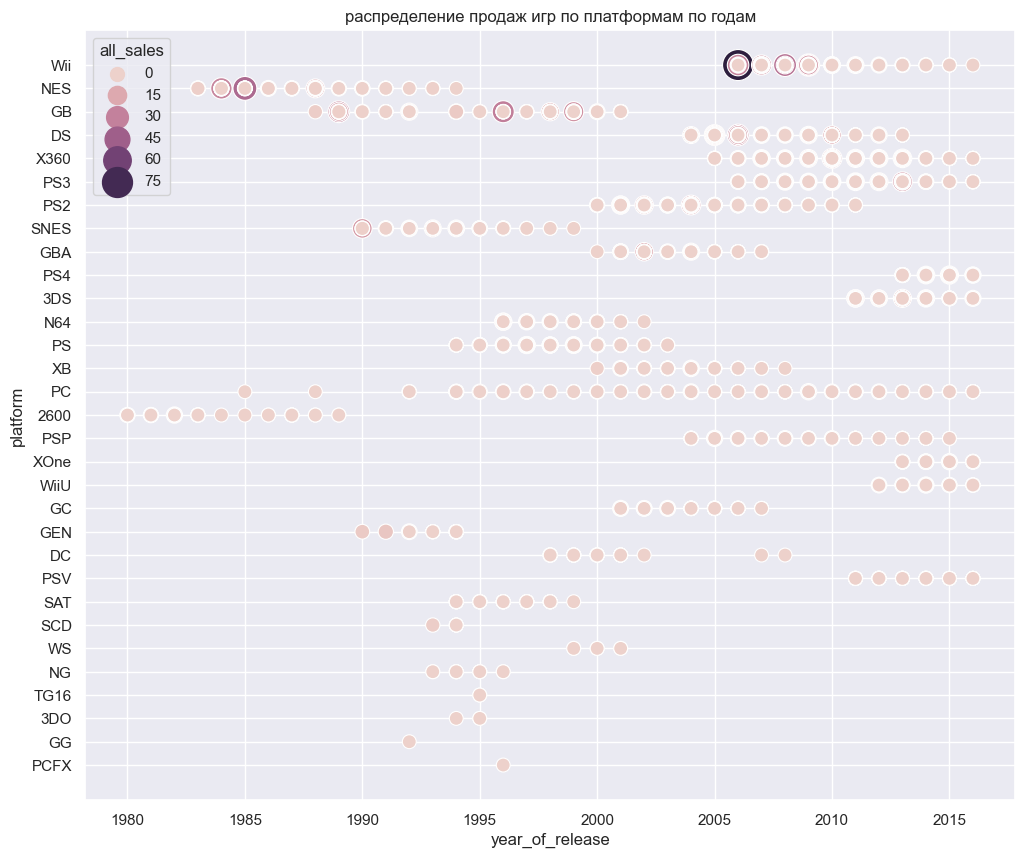

In [45]:
#был построен график распределение продаж игр по платформам по годам
sns.set(rc={'figure.figsize':(12,10)})
sns.scatterplot(data=games_filtered, x='year_of_release', y='platform', hue='all_sales', size='all_sales',
    sizes=(100, 500), legend='brief').set(title='распределение продаж игр по платформам по годам');
#на графике видны значительные данные продаж у платформы Wii в период с 2005 по 2010 гг. 

In [46]:
#были рассмотрены платформ по сумме продаж распределенные по годам
platform_sales  = games_years_relevant.pivot_table(
    index = 'platform',
    columns = 'year_of_release',
    values = 'all_sales',
    aggfunc = 'sum',
    fill_value = 0,
    margins = True)
platform_sales

year_of_release,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
platform,,,,,,,,,,,,,,,,,,,,,
3DO,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08
3DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,63.20,51.36,56.57,43.76,27.78,15.14,257.81
DC,0.00,0.00,0.00,3.38,5.16,5.99,1.07,0.29,0.00,0.00,...,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15.95
DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,17.27,...,145.31,119.54,85.02,26.18,11.01,1.54,0.00,0.00,0.00,802.76
GB,3.60,36.03,6.37,26.90,38.00,19.76,9.24,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,139.90
GBA,0.00,0.00,0.00,0.00,0.00,0.07,61.53,74.16,56.67,77.91,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,312.88
GC,0.00,0.00,0.00,0.00,0.00,0.00,26.34,51.81,50.61,28.82,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,196.73
N64,0.00,34.10,39.50,49.24,57.87,33.97,3.25,0.08,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,218.01
NG,0.33,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.43


#### выявление соответствующего актуального периода и лидеров платформ

In [47]:
#подсчет продолжительности жизни каждого из платформ по годам
platform_lifespan = games.pivot_table(
    index = 'platform',
    values = 'year_of_release',
    aggfunc = ['min','max'])
platform_lifespan['lifespan'] = platform_lifespan ['max'] - platform_lifespan ['min']
platform_lifespan

,min,max,lifespan
,year_of_release,year_of_release,
platform,,,
2600,1980,1989,9
3DO,1994,1995,1
3DS,2011,2016,5
DC,1998,2008,10
DS,1985,2013,28
GB,1988,2001,13
GBA,2000,2007,7
GC,2001,2007,6


In [48]:
#подсчет средней продолжительности жизни платформ по годам
platform_lifespan.median()

min       year_of_release    1996.0
max       year_of_release    2007.0
lifespan                        6.0
dtype: float64

In [49]:
#Поскольку среденей продолжительностью жизни платформ для игр являетя 6 лет, актуальными годами были выбраны последние 3 года (2014-2016)
relevant_years = games_years_relevant.loc[games_years_relevant['year_of_release'] >= 2014].reset_index(drop=True)

In [50]:
#были рассмотрены топ-10 платформ по актульаным годам (с 2014 г) по сумме продаж распределенные по годам
top10_platform_sales  = relevant_years.pivot_table(
    index = 'platform',
    columns = 'year_of_release',
    values = 'all_sales',
    aggfunc = 'sum',
    fill_value = 0,
    margins = True)
top10_platform_sales = top10_platform_sales.sort_values(by='All', ascending=False).head(10)
top10_platform_sales

year_of_release,2014,2015,2016,All
platform,,,,
All,331.53,267.98,129.94,729.45
PS4,100.00,118.90,69.25,288.15
XOne,54.07,60.14,26.15,140.36
3DS,43.76,27.78,15.14,86.68
PS3,47.76,16.82,3.60,68.18
X360,34.74,11.96,1.52,48.22
WiiU,22.03,16.35,4.60,42.98
PC,13.28,8.52,5.25,27.05
PSV,11.90,6.25,4.25,22.40


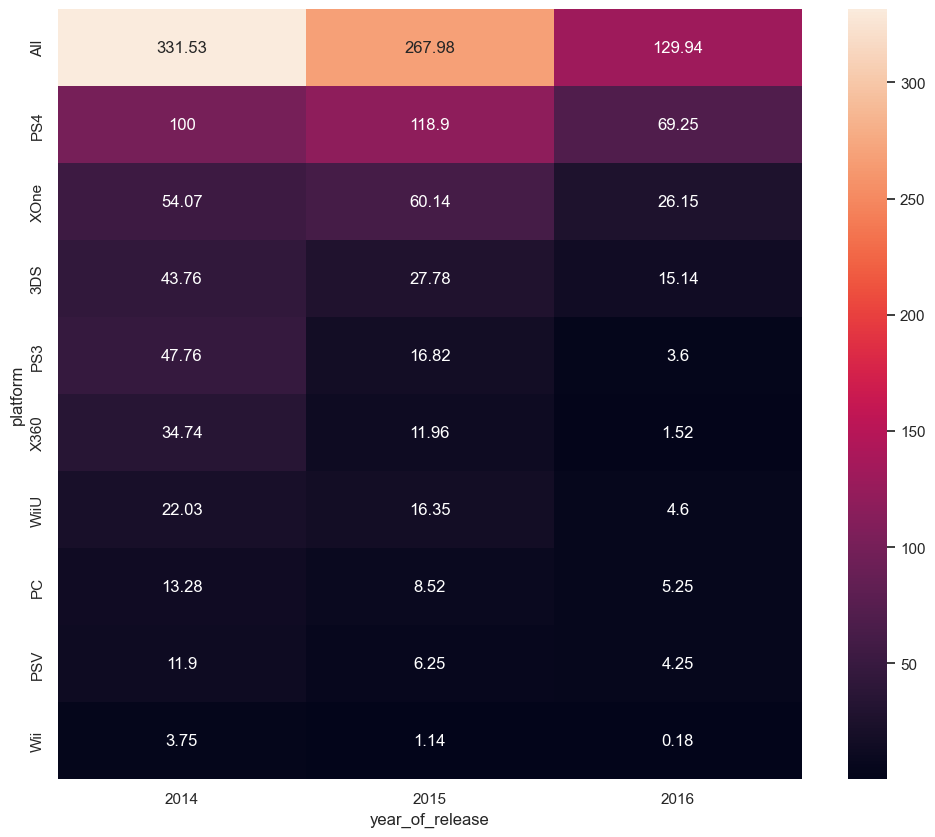

In [51]:
#для визуализации результатов использовался heatmap
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(top10_platform_sales.drop(columns = 'All'), annot=True, fmt='g');

In [52]:
#были рассмотрены топ-10 платформ по актульаным годам (с 2006г) по количеству продаж распределенные по годам
top10_platform_count = relevant_years.pivot_table(
    index = 'platform',
    columns = 'year_of_release',
    values = 'all_sales',
    aggfunc = 'count',
    fill_value = 0,
    margins = True)
top10_platform_count = top10_platform_count.sort_values(by='All', ascending = False).head(10)
top10_platform_count

year_of_release,2014,2015,2016,All
platform,,,,
All,581,606,502,1689
PS4,75,137,164,376
PSV,100,110,85,295
XOne,61,80,87,228
PS3,108,73,38,219
3DS,80,86,46,212
PC,47,50,54,151
X360,63,35,13,111
WiiU,31,28,14,73


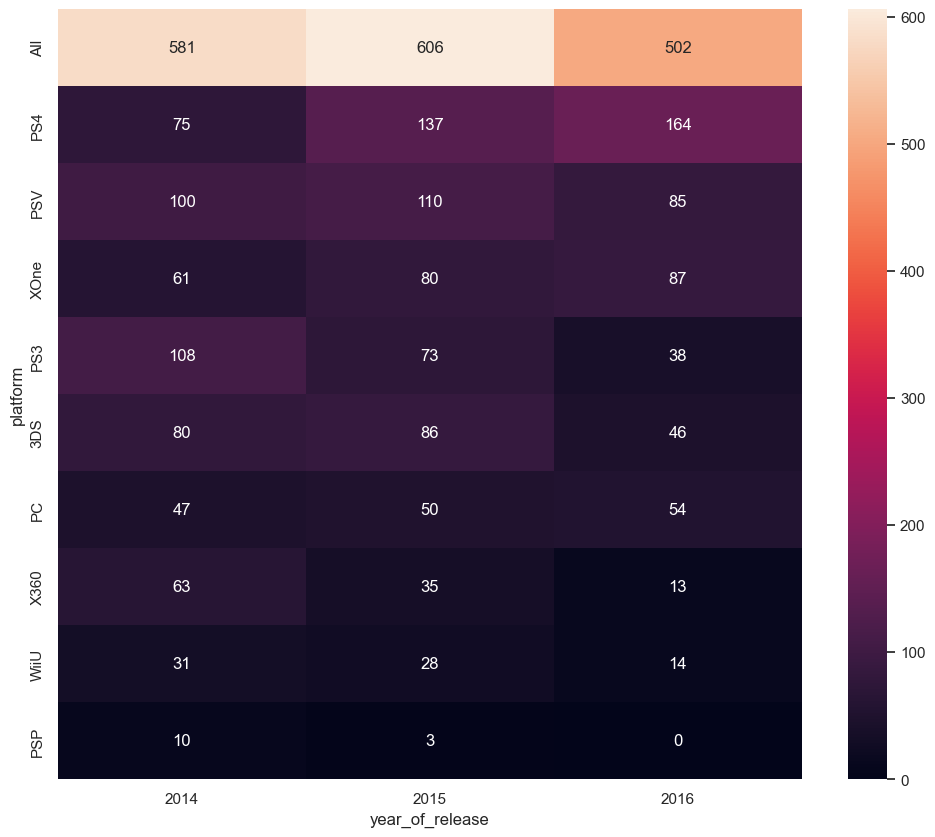

In [53]:
#для визуализации результатов использовался heatmap
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(top10_platform_count.drop(columns = 'All'), annot=True, fmt='g');

**Выводы:** Учитывая, что средней продолжительностью жизни платформ для игр являетcя 6 лет и поскольку тенденции в индустрии компьютерных игр динамически меняются, а нам нужно спрогнозировать 2017 г., актуальными годами были выбраны последние 3 года (2014-2016). Поэтому поменялись лидеры с предыдущего кода. Если в предыдущем коде самыми прибыльными платформами были X360, PS3 и Wii (за последние 10 лет), то за последние 3 года - PS4 и за ним - Xbox One. Обе платформы вышли в 2013 г. Распределение по годами показали, что у PS4 и Xbox One, больше всего продаж приходилось на 2015 г. Замечено, что данные за 2016 намного ниже у всех платформ, что скорее всего обуславливается тем, что они не полные. Хотя, в 2016 у PS4 и немного у XOne увеличилось количество платформ, а у всех остальных количество платформ намного ниже предыдущих лет.

#### Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам

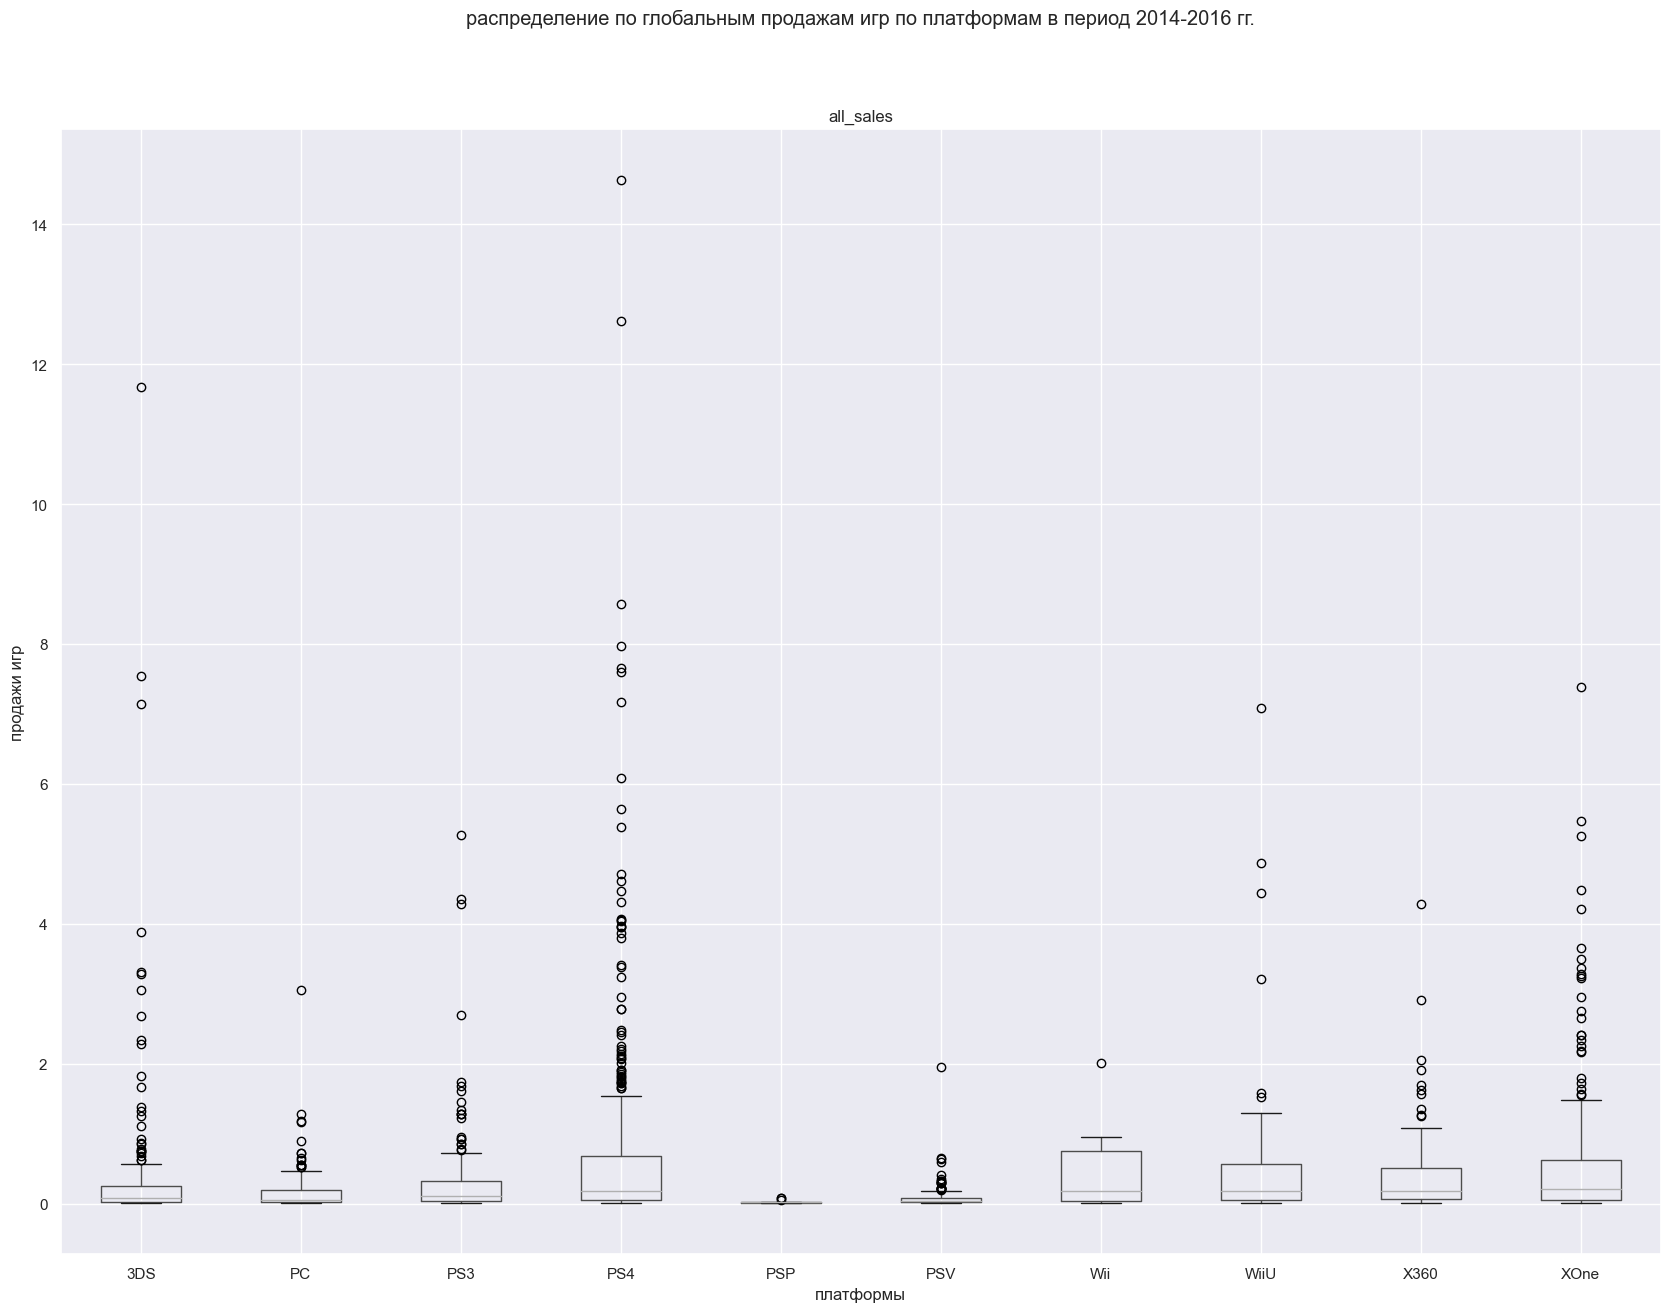

In [54]:
#диаграмма размаха со всеми выбросами
platform_sales_filtered = relevant_years.boxplot(column='all_sales', 
            by='platform',
            figsize=(20, 15));
plt.suptitle('распределение по глобальным продажам игр по платформам в период 2014-2016 гг.')
plt.xlabel("платформы")
plt.ylabel("продажи игр")
plt.show();

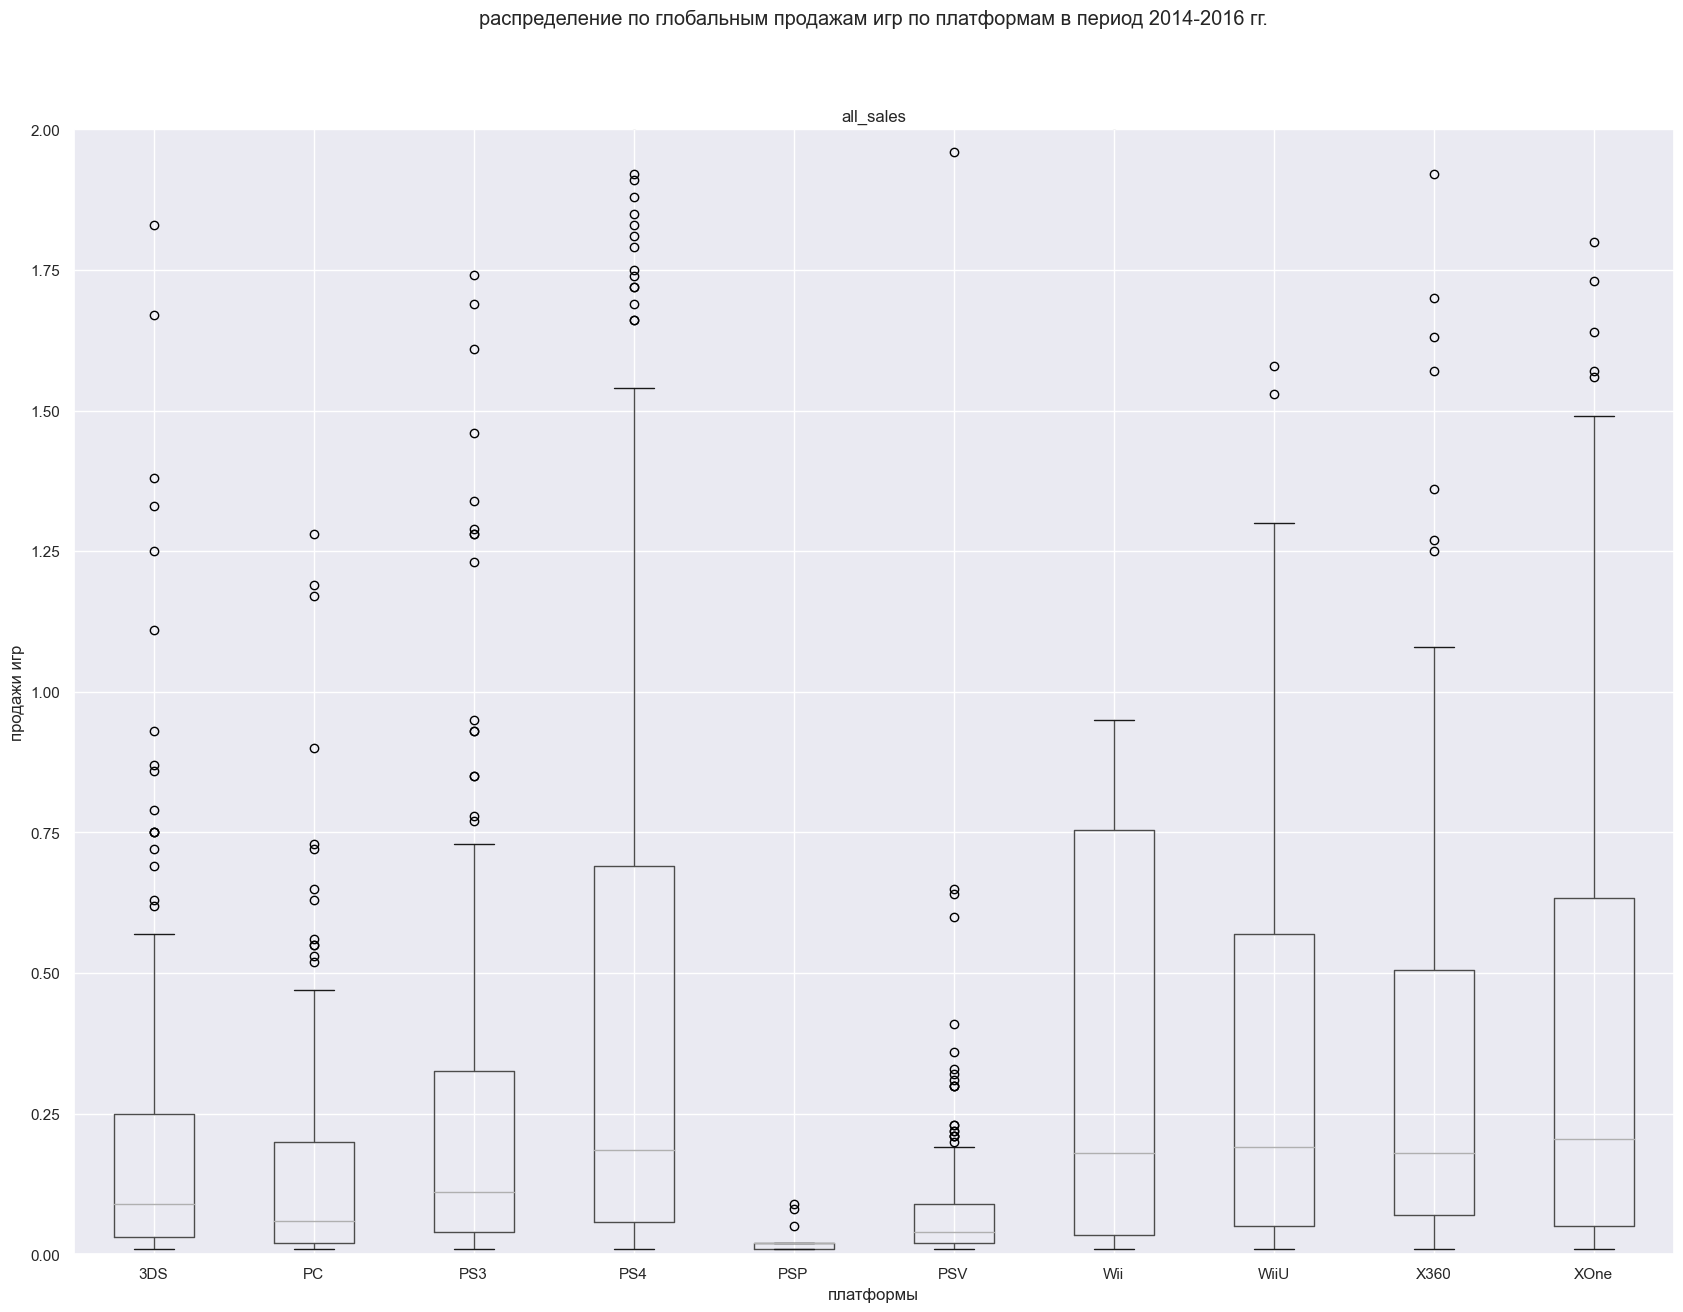

In [55]:
#диаграмма размаха маштабированная с выбросами от 0 до 2
platform_sales_filtered = relevant_years.boxplot(column='all_sales', 
            by='platform',
            figsize=(20, 15));
plt.suptitle('распределение по глобальным продажам игр по платформам в период 2014-2016 гг.')
plt.xlabel("платформы")
plt.ylabel("продажи игр")
plt.ylim (0,2)
plt.show();

**Выводы:** При построении график «ящик с усами» (диаграммы размаха) по глобальным продажам игр по платформам в период 2014-2016 гг. были выявлены выбросы. После масштабирования графика было решено эти выбросы не удалять. Есть вероятность того, эти выбросы являются результатом низких продаж у менее популярных платформ, особенно в 2016 г. Тем самым, удалив их, есть вероятность получить искажения в данных.

#### Рассмотрение продаж внутри одной популярной платформы и влияние на них отзывов пользователей и критиков

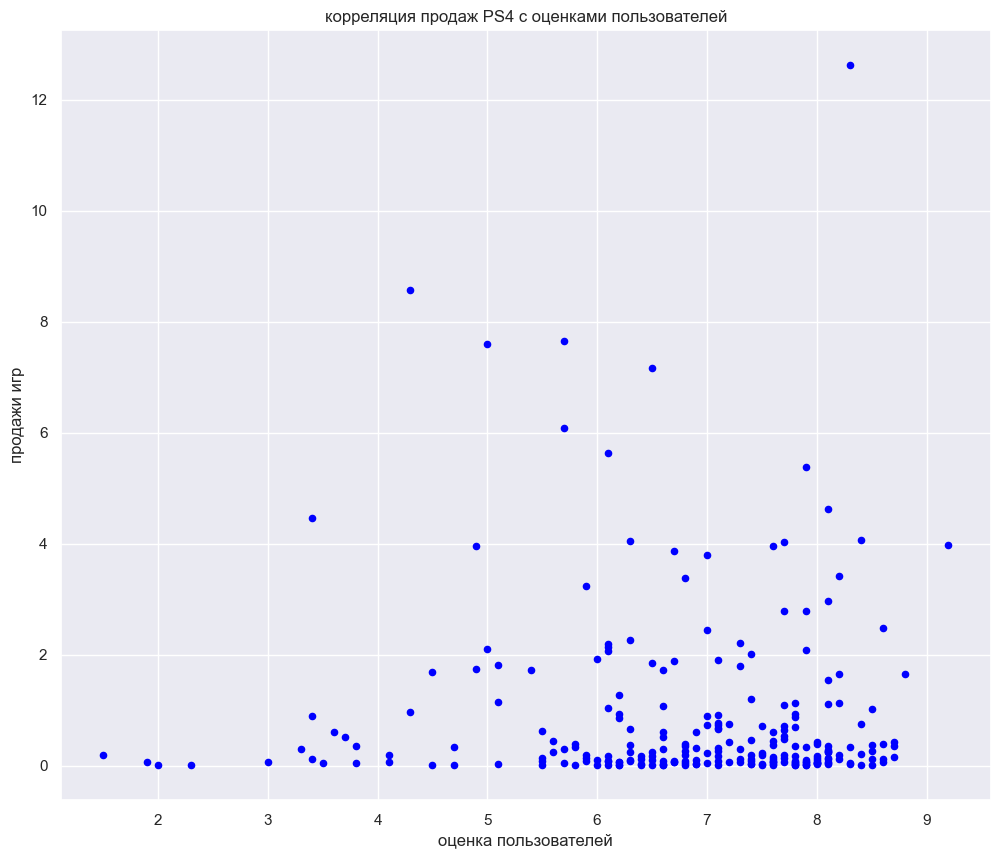

In [56]:
#была создана переменная для корреляции самой популярной платформе PS4 с оценками пользователей 
# без заглушек и на основе актуального периода
PS4_filter_user = relevant_years.loc[(relevant_years['platform'] == 'PS4')&
                                 (relevant_years['user_score'] != -1), ['all_sales','user_score']]

#визуализация по диаграмме рассеивания
PS4_filter_user.plot(x='user_score', y='all_sales', kind='scatter', color ='blue')
plt.title('корреляция продаж PS4 с оценками пользователей')
plt.xlabel('оценка пользователей')
plt.ylabel('продажи игр')
plt.show();

In [57]:
# была проверена корреляция
PS4_filter_user.corr()

,all_sales,user_score
all_sales,1.000000,-0.040132
user_score,-0.040132,1.000000


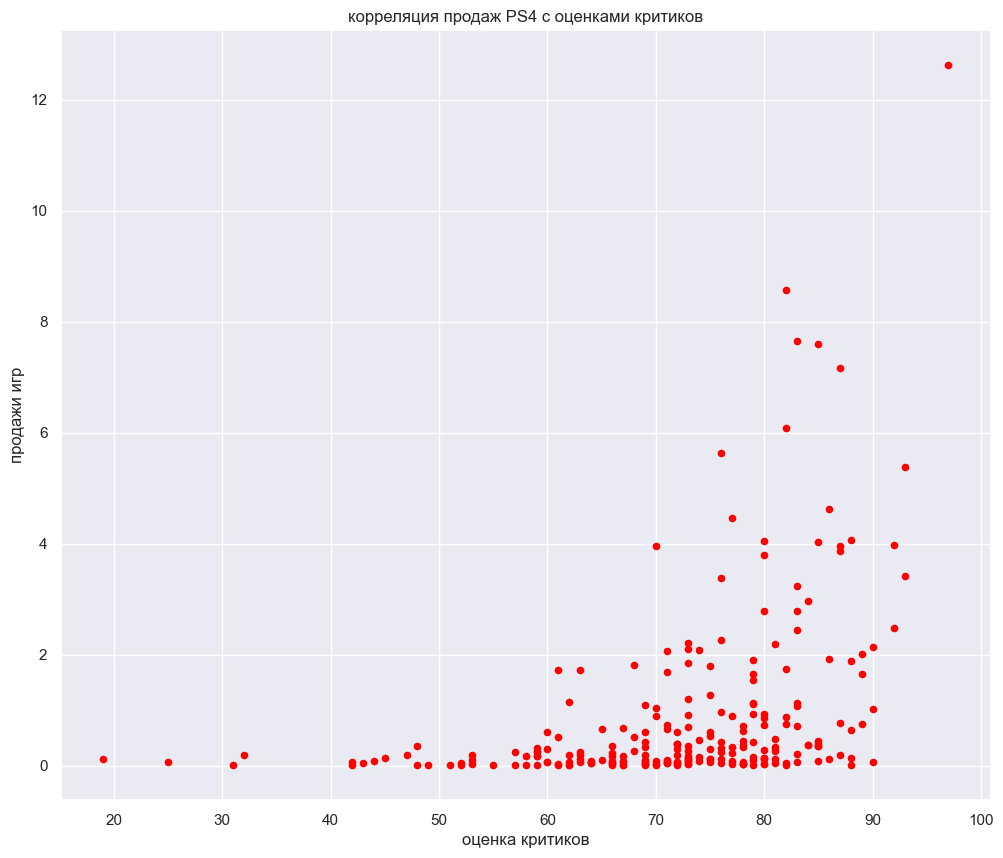

In [58]:
#была создана переменная для корреляции самой популярной платформе PS4 с оценками критик 
# без заглушек и на основе актуального периода
PS4_filter_critic = relevant_years.query('platform == "PS4" and critic_score != -1')[['all_sales','critic_score']]

#визуализация по диаграмме рассеивания 
PS4_filter_critic.plot(x='critic_score', y='all_sales', kind='scatter', color = 'red');
plt.title('корреляция продаж PS4 с оценками критиков')
plt.xlabel('оценка критиков')
plt.ylabel('продажи игр')
plt.show();

In [59]:
# была проверена корреляция
PS4_filter_critic.corr()

,all_sales,critic_score
all_sales,1.000000,0.402661
critic_score,0.402661,1.000000


**Выводы:** Корреляция показала слабую зависимость оценки критиков и пользователей на платформы. Оценка пользователей показывает низкую отрицательную корреляцию, а оценка критиков - низкую положительную корреляцию.

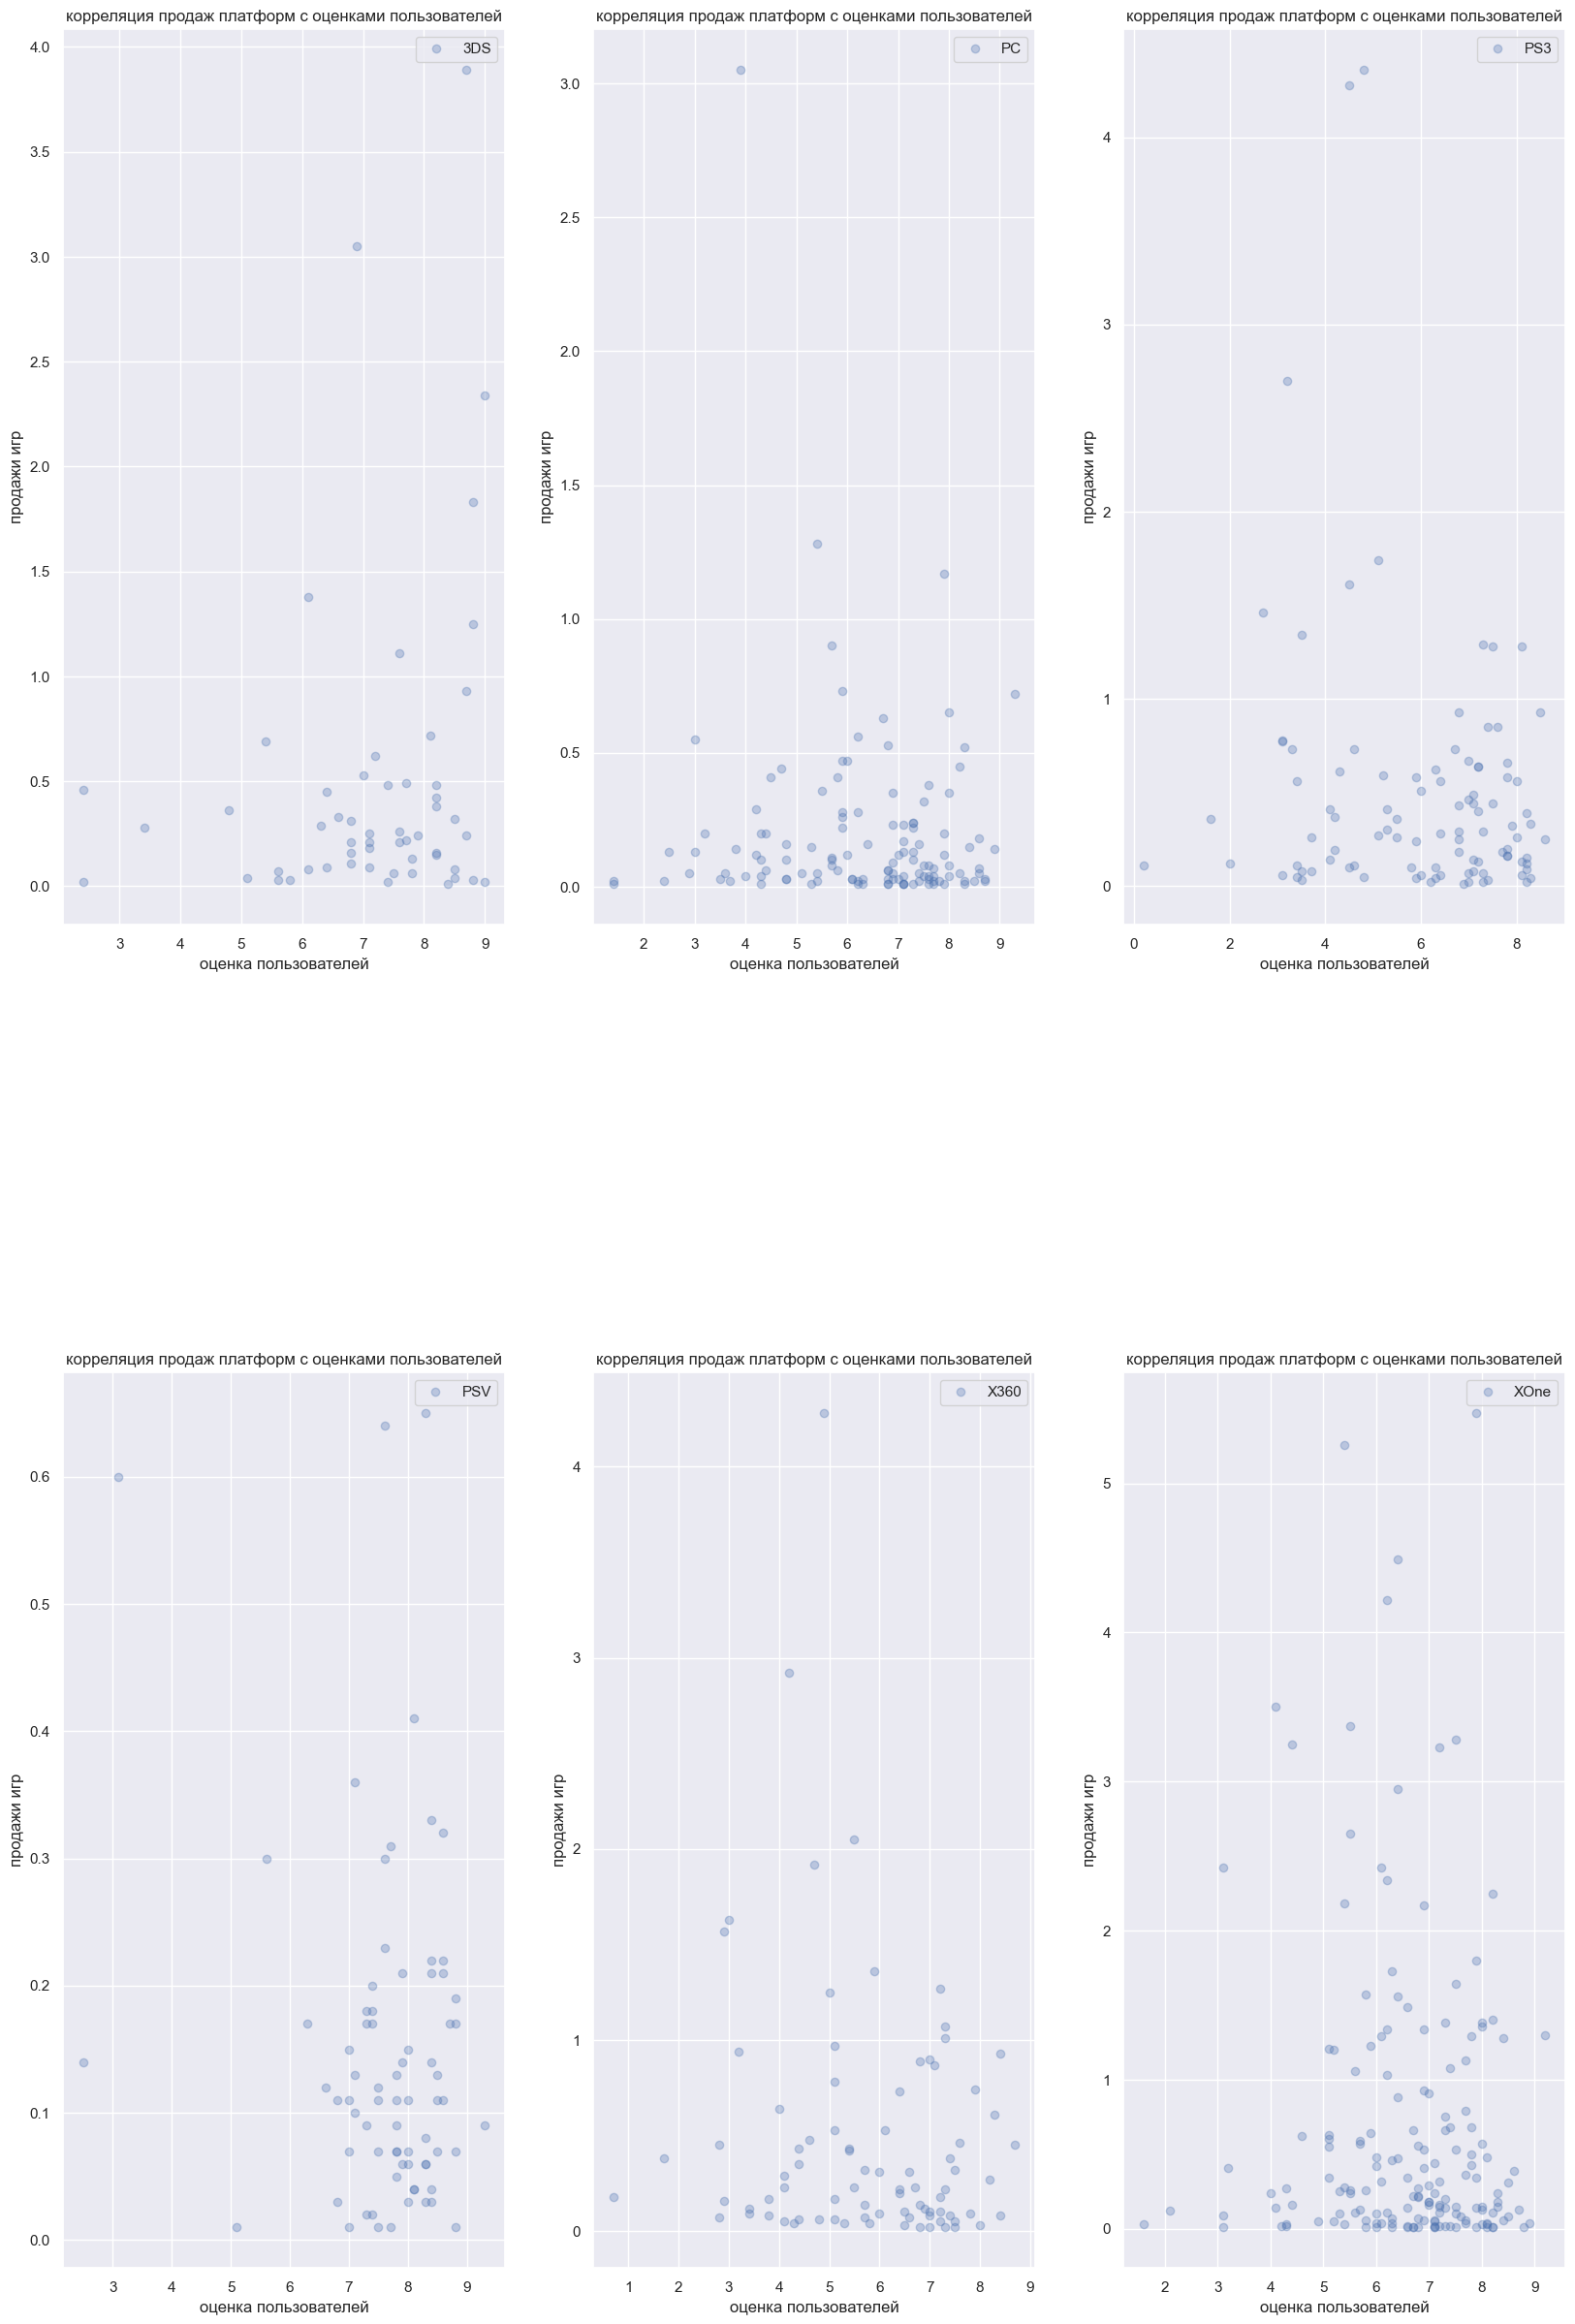

In [60]:
# был проведен анализ влияния оценок пользователей на продажи по нескольким платформам
# были выбраны 6 платформ
platform_filtered_user = relevant_years[(relevant_years['platform'] != 'PS4')&
                                 (relevant_years['user_score'] != -1)]
plt.figure(figsize=(20,30))
plt.subplots_adjust(hspace=0.5)
serial_number =1

relevant_platforms = platform_filtered_user['platform'].value_counts().head(6).index

for platform, games_platform in platform_filtered_user.groupby('platform'):
    if platform in relevant_platforms:
        ax = plt.subplot(2,3,serial_number)
        games_platform.plot(x='user_score', y='all_sales', style='o', label = platform, ax=ax, alpha=0.3)
        serial_number += 1
        plt.title('корреляция продаж платформ с оценками пользователей')
        plt.xlabel('оценка пользователей')
        plt.ylabel('продажи игр');
    

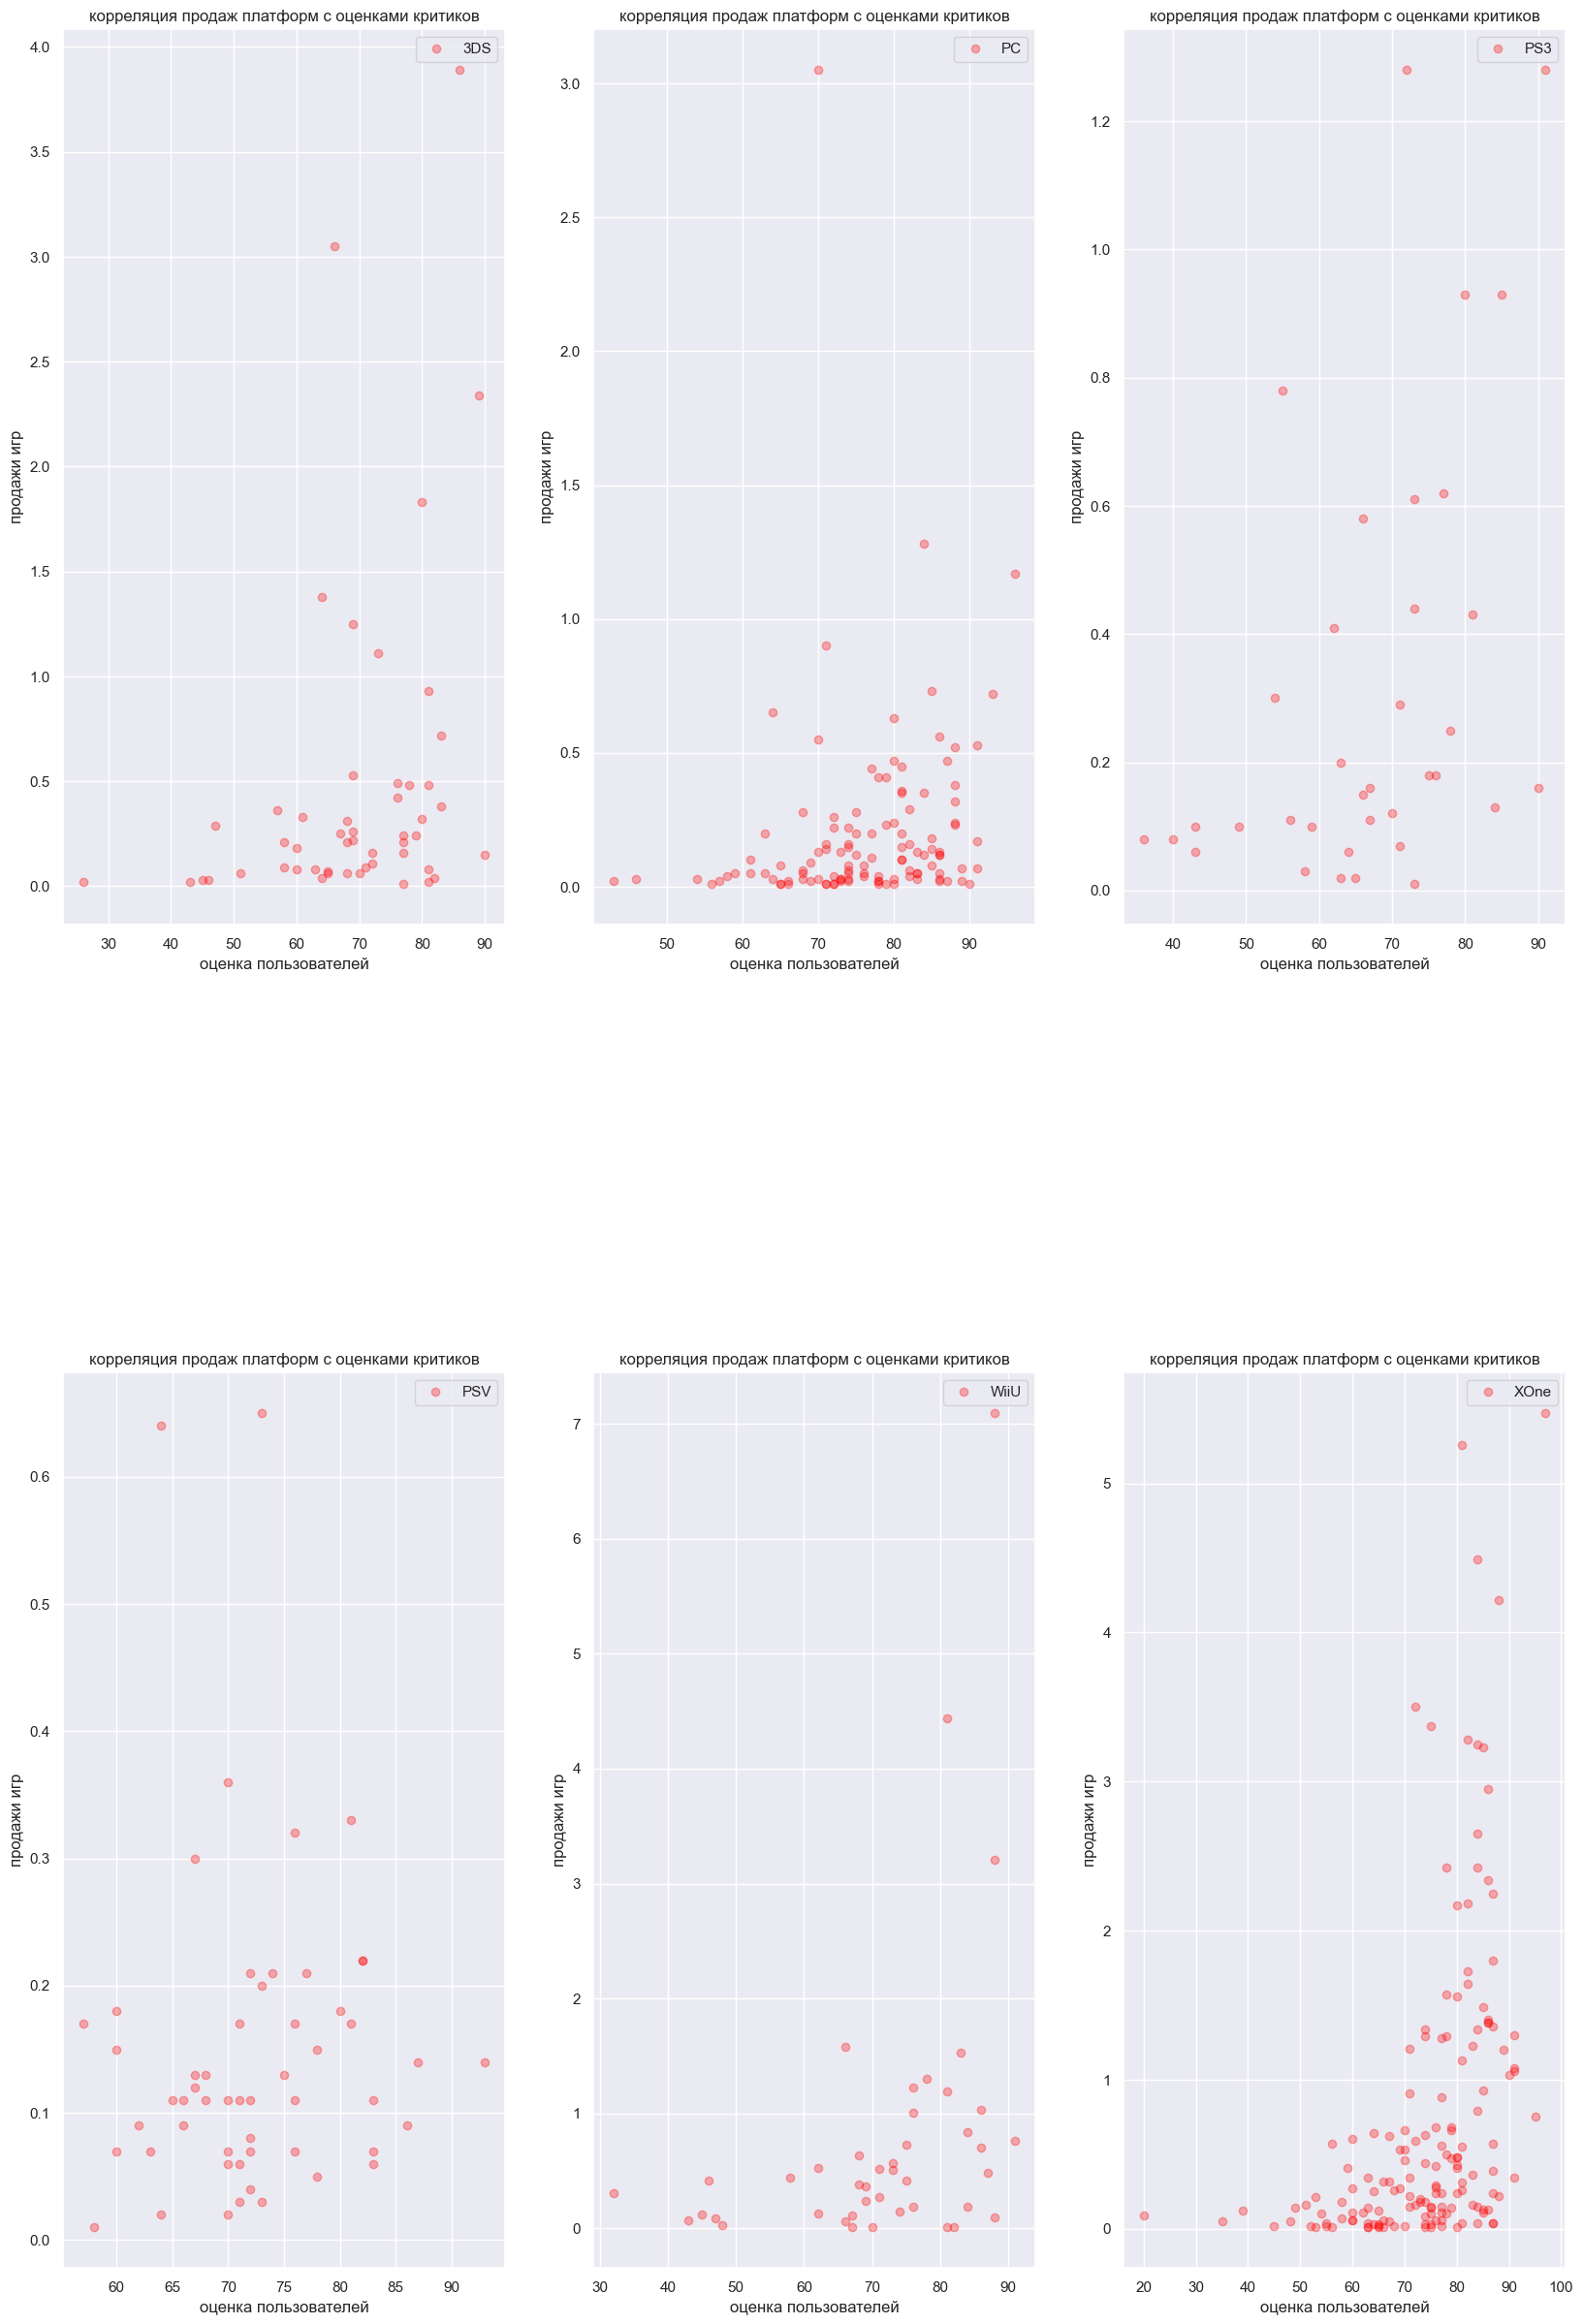

In [61]:
# был проведен анализ влияния оценок критикиво на продажи по нескольким платформам
# были выбраны 6 платформ
platform_filtered_critic = relevant_years[(relevant_years['platform'] != 'PS4')&
                                 (relevant_years['critic_score'] != -1)]
plt.figure(figsize=(20,30))
plt.subplots_adjust(hspace=0.5)
serial_number =1

relevant_platforms = platform_filtered_critic['platform'].value_counts().head(6).index

for platform, games_platform in platform_filtered_critic.groupby('platform'):
    if platform in relevant_platforms:
        ax = plt.subplot(2,3,serial_number)
        games_platform.plot(x='critic_score', y='all_sales', style='o', label = platform, ax=ax, color ='red', alpha=0.3)
        serial_number += 1
        plt.title('корреляция продаж платформ с оценками критиков')
        plt.xlabel('оценка пользователей')
        plt.ylabel('продажи игр');

In [62]:
# для точного сравнения корреляции платформ для несколько из них была подсчитана корреляция по оценкам пользователей
PS3_filter_user = relevant_years.loc[(relevant_years['platform'] == 'PS3')&
                                 (relevant_years['user_score'] != -1), ['all_sales','user_score']]
PS3_filter_user.corr()

,all_sales,user_score
all_sales,1.000000,-0.166761
user_score,-0.166761,1.000000


In [63]:
#подсчитана корреляция по оценкам критиков платформы PS3
PS3_filter_critic = relevant_years.loc[(relevant_years['platform'] == 'PS3')&
                                 (relevant_years['critic_score'] != -1), ['all_sales','user_score']]
PS3_filter_critic.corr()

,all_sales,user_score
all_sales,1.000000,0.156595
user_score,0.156595,1.000000


In [64]:
#подсчитана корреляция по оценкам пользователей PSV
PSV_filter_user = relevant_years.loc[(relevant_years['platform'] == 'PSV')&
                                 (relevant_years['user_score'] != -1), ['all_sales','user_score']]
PSV_filter_user.corr()

,all_sales,user_score
all_sales,1.000000,-0.168455
user_score,-0.168455,1.000000


In [65]:
#подсчитана корреляция по оценкам критиков платформы PSV
PSV_filter_critic = relevant_years.loc[(relevant_years['platform'] == 'PSV')&
                                 (relevant_years['critic_score'] != -1), ['all_sales','user_score']]
PSV_filter_critic.corr()

,all_sales,user_score
all_sales,1.000000,0.048583
user_score,0.048583,1.000000


In [66]:
#подсчитана корреляция по оценкам пользователей XOne
XOne_filter_user = relevant_years.loc[(relevant_years['platform'] == 'XOne')&
                                 (relevant_years['user_score'] != -1), ['all_sales','user_score']]
XOne_filter_user.corr()

,all_sales,user_score
all_sales,1.000000,-0.070384
user_score,-0.070384,1.000000


In [67]:
#подсчитана корреляция по оценкам критиков платформы XOne
XOne_filter_critic = relevant_years.loc[(relevant_years['platform'] == 'XOne')&
                                 (relevant_years['critic_score'] != -1), ['all_sales','user_score']]
XOne_filter_critic.corr()

,all_sales,user_score
all_sales,1.000000,0.007396
user_score,0.007396,1.000000


In [68]:
#подсчитана корреляция по оценкам пользователей платформы WiiU
WiiU_filter_user = relevant_years.loc[(relevant_years['platform'] == 'WiiU')&
                                 (relevant_years['user_score'] != -1), ['all_sales','user_score']]
WiiU_filter_user.corr()

,all_sales,user_score
all_sales,1.000000,0.407926
user_score,0.407926,1.000000


In [69]:
#подсчитана корреляция по оценкам критиков платформы WiiU
WiiU_filter_critic = relevant_years.loc[(relevant_years['platform'] == 'WiiU')&
                                 (relevant_years['critic_score'] != -1), ['all_sales','user_score']]
WiiU_filter_critic.corr()

,all_sales,user_score
all_sales,1.000000,0.346501
user_score,0.346501,1.000000


**Выводы:** Был проведен анализ влияния оценок пользователей и критиков на продажи по нескольким платформам. Для анализа были выбраны 6 платформ, которые подходили под установленные условия. Оценки на платформы в основном показывают не сильную корреляцию. Отдельно были рассмотрены 4 платформы с наиболее разными диаграммами рассеивания между оценками пользователей и критиков. У троих платформ оценка пользователей отрицательная, как и у PS4, но намного ниже. Однако, у WiiU она положительная низкая корреляция. Оценка пользователей у всех положительная, но низкая, кроме WiiU.

#### Построение общего распределения игр по жанрам

In [70]:
#общее распределение игр по жанрам в разбивке по продажам
games_genre = (relevant_years.pivot_table('all_sales', 'genre', aggfunc='median')
               .sort_values(by='all_sales', ascending=False))
games_genre           

,all_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


In [71]:
#для анализа были выбраны данные 2016 г.
games_years_2016 = games.loc[games['year_of_release'] == 2016].reset_index(drop=True)

games_genre_2016 = (games_years_2016.pivot_table('all_sales', 'genre', aggfunc='median')
               .sort_values(by='all_sales', ascending=False))

games_genre_2016

,all_sales
genre,
Shooter,0.240
Role-Playing,0.120
Sports,0.120
Platform,0.100
Fighting,0.085
Strategy,0.060
Action,0.050
Racing,0.050
Misc,0.040


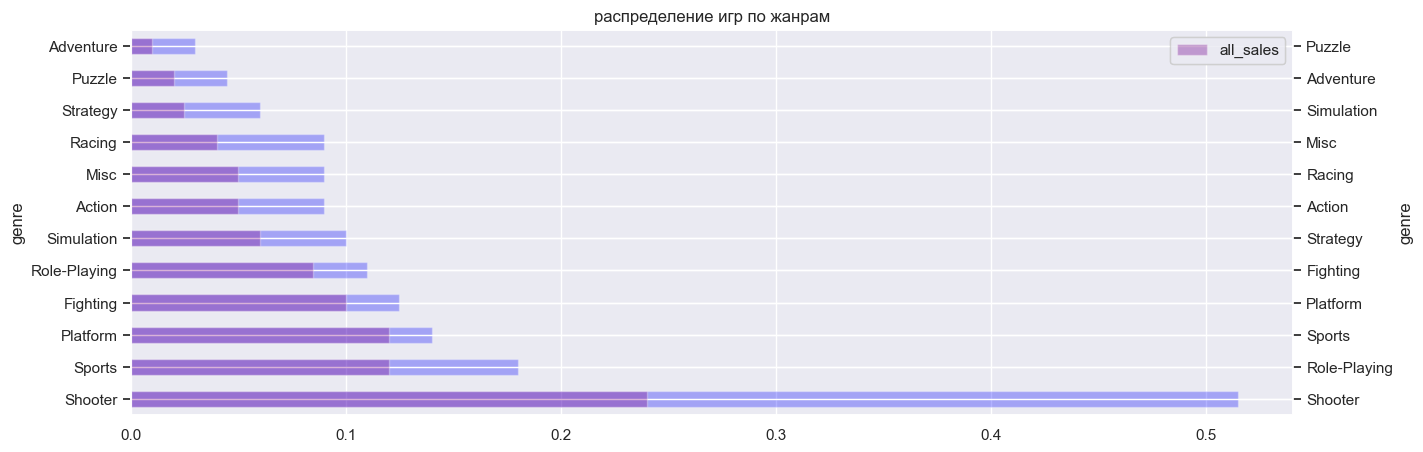

In [72]:
#график распределения игр по жанрам
fig, ax = plt.subplots()
(games_genre
 .plot(kind='barh', figsize=(15,5), color ='blue', alpha = .3, ax=ax));
ax2=ax.twinx()
(games_genre_2016
 .plot(kind='barh', figsize=(15,5), color ='purple', alpha = .3, ax=ax2)
 .set(title='распределение игр по жанрам'));

**Общие выводы по продажам игр в разбивке по платформам:**

- При просмотре данных всех платформ было замечено, что выбранные в начале период с 1995 по 2005 по продажам имеют низкие продажи. Тем самым, для анализа платформ по продажам был выбран период с 2006 по 2016 гг. 
 - Данные показали, что самыми прибыльными платформами с 2006 по 2016 гг. были X360, PS3 и Wii. 
 - Распределение по годами показали, что у X360 больше всего продаж приходилось на 2010 г., у PS3 - 2011г., а у Wii  - 2009 г. 
 - Более того платформа Wii в 2009 заработала больше, чем у кого-либо за весь период (2006-2016 гг.).


- Замечено, что данные за 2016 намного ниже, что скорее всего обуславливается тем, что они не полные. 


- При построении график «ящик с усами» по глобальным продажам игр в разбивке по платформам были выявлены хвосты и выбросы, что показывает различие платформ по медианному значению. Большое количество выбросов во многих платформах объясняется низкими продажами и выпуска на рынок или исчезновения их с рынка в различные года. 


- В соответствии с продажами платформы средняя продолжительность жизни платформ на рынке - 6 лет. 
 - В среднем платформы вышли с рынка в 1996 г. и выпускались в среднем в 2007 г. 
 - Дольше всего держаться игры для компьютеров (PC), не смотря на появление таких конкурентов как X360, PS3 и Wii. Эти 3 платформы конкурируют на рынке между собой уже более 10 лет. 
 - Однако с 2015 г. эти 3 платформы начали сдавать позиции более современной платформе PS4. 


- Таким образом, судя по тенденции можно предполагать, что на 2017 г. продажи PS4 будут оставаться выше, чем у остальных платформ.


- Корреляция показала сильную зависимость оценки критиков и пользователей на платформы. 
 - Например, на самый популярный в последние года - PS4, видна относительная зависимость этих оценок. 
 - Высокая зависимость видна и в платформе лидер (по всему периоду) X360 и по не популярной платформе 3DS. 
 - Однако по продажам оценки не сильно зависят.


- Сравнение общего распределения игр по жанрам показала, что самые прибыльными являются игры типа стрелялок, платформ и спортивные как за весь период, так и только за 2016 г. Самым низким типом игр является приключенческие игры.



## Составление портрета пользователя каждого региона

### Определение топ-5 самых популярных платформ

In [73]:
# выявление самых популярных платформ (топ-5) по актуальному периоду
top_5_platform_rel = (relevant_years.pivot_table(['NA_sales','JP_sales', 'EU_sales', 'other_sales', 'all_sales'],['platform'],aggfunc ='sum')
                  .sort_values(by='all_sales', ascending =False).reset_index())
top_5_platform_rel = top_5_platform_rel.head()
top_5_platform_rel

,platform,EU_sales,JP_sales,NA_sales,all_sales,other_sales
0,PS4,130.04,15.02,98.61,288.15,44.48
1,XOne,46.25,0.32,81.27,140.36,12.52
2,3DS,16.12,44.24,22.64,86.68,3.68
3,PS3,25.54,11.22,22.05,68.18,9.37
4,X360,15.49,0.08,28.30,48.22,4.35


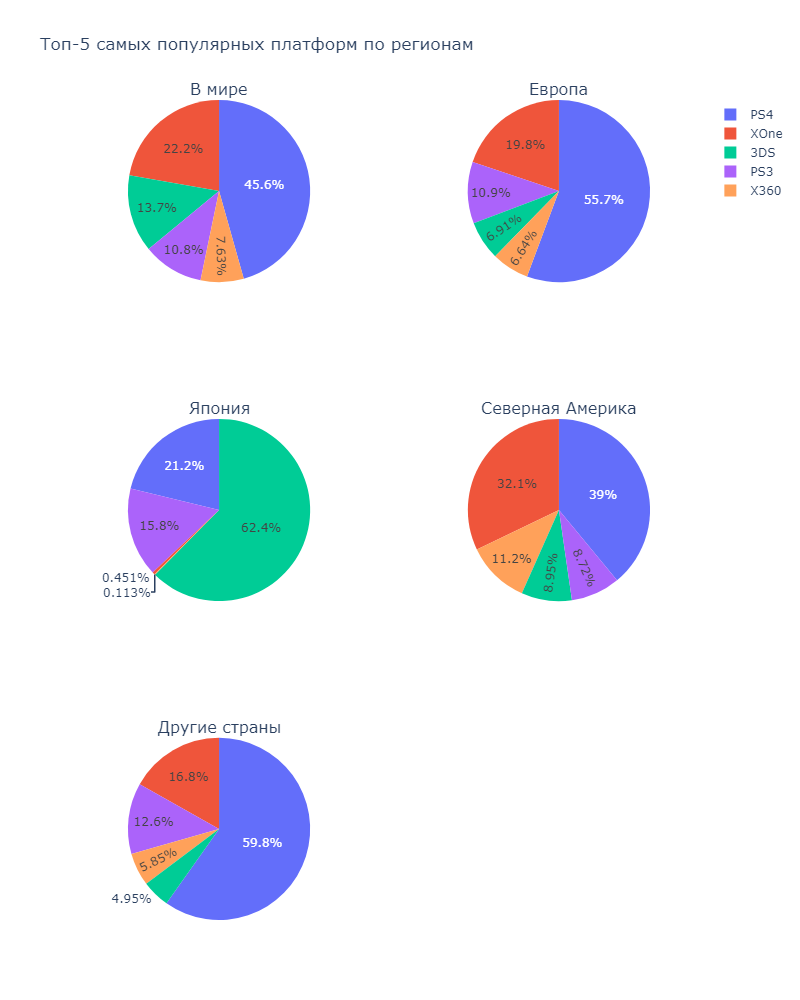

In [74]:
# выведение данных по пользователям разных регионов по актуальному периоду
fig = make_subplots(
   rows=3, cols=2, subplot_titles=("В мире", "Европа", "Япония","Северная Америка", "Другие страны"),
   specs=[[{"type": "pie"}, {"type": "pie"}],[{"type": "pie"}, {"type": "pie"}], [{"type": "pie"}, None]]
)

# pie chart в мире
fig.add_trace(go.Pie(
   values=top_5_platform_rel['all_sales'],
   labels=top_5_platform_rel['platform'],
   domain=dict(x=[0, 0.5]),
   name="в мире"),
   row=1, col=1, 
)
          
# pie chart Европа
fig.add_trace(go.Pie(
   values=top_5_platform_rel['EU_sales'],
   labels=top_5_platform_rel['platform'], 
   domain=dict(x=[0.5, 1.0]),
   name="Европа"),
   row=1, col=2, 
)


#pie chart Япония
fig.add_trace(go.Pie(
   values=top_5_platform_rel['JP_sales'],
   labels=top_5_platform_rel['platform'],
   domain=dict(x=[0, 0.5]),
   name="Япония"),
   row=2, col=1
)

#pie chart Северная Америка
fig.add_trace(go.Pie(
   values=top_5_platform_rel['NA_sales'],
   labels=top_5_platform_rel['platform'],
   domain=dict(x=[0.5, 1.0]),
   name="Северная Америка"),
   row=2, col=2
)

#pie chart другие
fig.add_trace(go.Pie(
   values=top_5_platform_rel['other_sales'],
   labels=top_5_platform_rel['platform'],
   domain=dict(x=[0, 0.5]),
   name="другие"),
   row=3, col=1
)
fig.update_layout(title_text="Топ-5 самых популярных платформ по регионам")
fig.update_layout(
    width=800,
    height=1000
)
fig.show('png')

**Вывод по популярным платформам в разрезе регионов:**
- В Северной Америке нету значительной разницы продаж между платформами, но больше всего популярностью пользуются PS4 (39%) и XOne (32,1%).
- В тоже время в Японии первое место уверенно занимает платформа 3DS (62,4%), а PS4 с большим отставанием занимает второе место (21,2%). 
- В Европе значительную долю занимает PS4 (55,7%), а за ним с большой разницей следует XOne (19,8%).
- В других регионах лидирует PS4 (60%) и XOne (17%)
- По общим продажам PS4 является самой популярной платформой.

### Определение топ-5 самых популярных жанров

In [75]:
# выявление самых популярных жанров (топ-5) по актуальному периоду
top_5_genre_rel = (relevant_years.pivot_table(['NA_sales','JP_sales', 'EU_sales', 'other_sales', 'all_sales'],['genre'],aggfunc ='sum')
                  .sort_values(by='all_sales', ascending =False).reset_index())
top_5_genre_rel = top_5_genre_rel.head()
top_5_genre_rel

,genre,EU_sales,JP_sales,NA_sales,all_sales,other_sales
0,Action,74.68,29.58,72.53,199.36,22.57
1,Shooter,65.52,4.87,79.02,170.94,21.53
2,Sports,45.73,3.26,46.13,109.48,14.36
3,Role-Playing,28.17,31.16,33.47,101.44,8.64
4,Misc,12.86,5.61,15.05,37.55,4.03


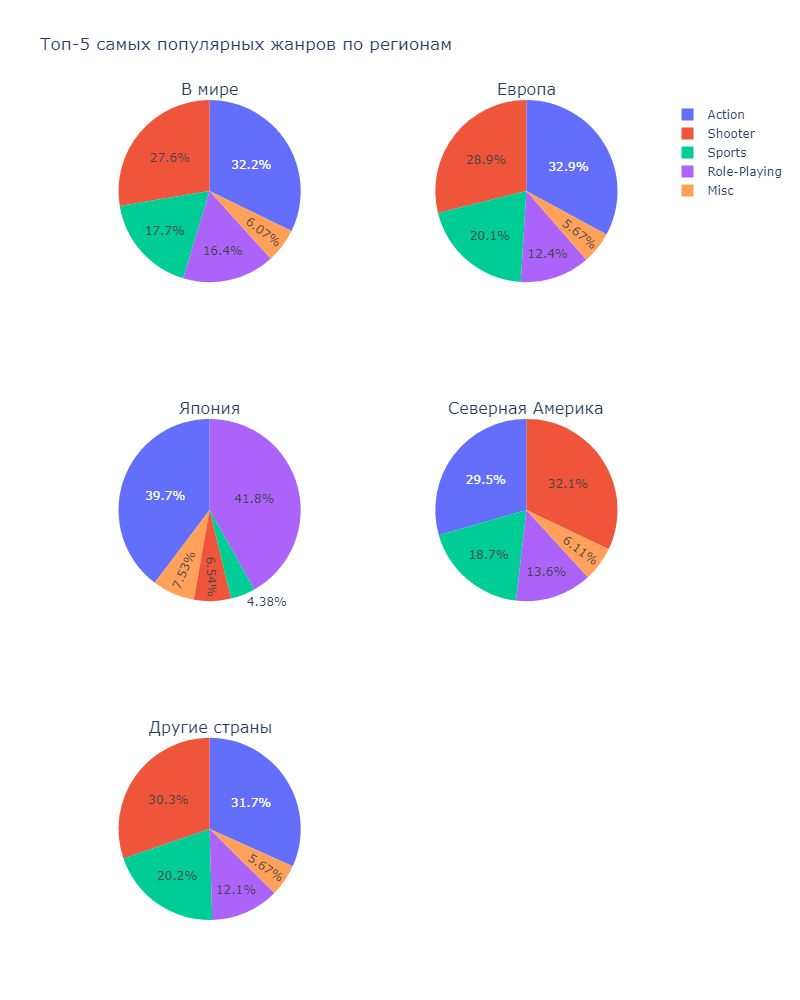

In [76]:
# выведение данных по пользователям разных регионов по актуальному периоду
fig = make_subplots(
   rows=3, cols=2, subplot_titles=("В мире", "Европа", "Япония","Северная Америка", "Другие страны"),
   specs=[[{"type": "pie"}, {"type": "pie"}],[{"type": "pie"}, {"type": "pie"}], [{"type": "pie"}, None]]
)

# pie chart в мире
fig.add_trace(go.Pie(
   values=top_5_genre_rel['all_sales'],
   labels=top_5_genre_rel['genre'],
   domain=dict(x=[0, 0.5]),
   name="в мире"),
   row=1, col=1, 
)
          
# pie chart Европа
fig.add_trace(go.Pie(
   values=top_5_genre_rel['EU_sales'],
   labels=top_5_genre_rel['genre'], 
   domain=dict(x=[0.5, 1.0]),
   name="Европа"),
   row=1, col=2, 
)


#pie chart Япония
fig.add_trace(go.Pie(
   values=top_5_genre_rel['JP_sales'],
   labels=top_5_genre_rel['genre'],
   domain=dict(x=[0, 0.5]),
   name="Япония"),
   row=2, col=1
)

#pie chart Северная Америка
fig.add_trace(go.Pie(
   values=top_5_genre_rel['NA_sales'],
   labels=top_5_genre_rel['genre'],
   domain=dict(x=[0.5, 1.0]),
   name="Северная Америка"),
   row=2, col=2
)

#pie chart другие
fig.add_trace(go.Pie(
   values=top_5_genre_rel['other_sales'],
   labels=top_5_genre_rel['genre'],
   domain=dict(x=[0, 0.5]),
   name="другие"),
   row=3, col=1
)
fig.update_layout(title_text="Топ-5 самых популярных жанров по регионам")
fig.update_layout(
    width=800,
    height=1000
)
fig.show('png')

**Вывод по популярным жанрам в разрезе регионов:**
- В Северной Америке популярными жанрам игр являются шутер игры (32,1%) и экшн игры (29,5%) 
- В Японии явными лидерами являются ролевые игры (41,8%) и экшн игры (39,7%)
- В Европе предпочтения схожи с Северной Америкой. На первом месте экшн игры (32,9%), на втором шутер игры (28,9%)
- В других регионах также лидирует экшн игры (32%) и шутер игры (30%)
- По общим продажам экшн игры (32,2%) и шутер игры (27,6%) являются самыми популярными жанрами

### Влияние рейтинга ESRB на продажи в отдельном регионе

In [77]:
#общее распределение рейтинга ESRB в разбивке по продажам в разных регионах 
rating_region_rel = (relevant_years.pivot_table(['NA_sales','JP_sales', 'EU_sales', 'other_sales'],['rating'],aggfunc ='sum')
                  .sort_values(by='rating'))
rating_region_rel

,EU_sales,JP_sales,NA_sales,other_sales
rating,,,,
E,58.06,8.94,50.74,15.39
E10+,26.16,4.46,33.23,7.83
M,93.44,8.01,96.42,28.67
T,34.07,14.78,38.95,11.33
no_rating,58.95,56.90,64.72,18.40


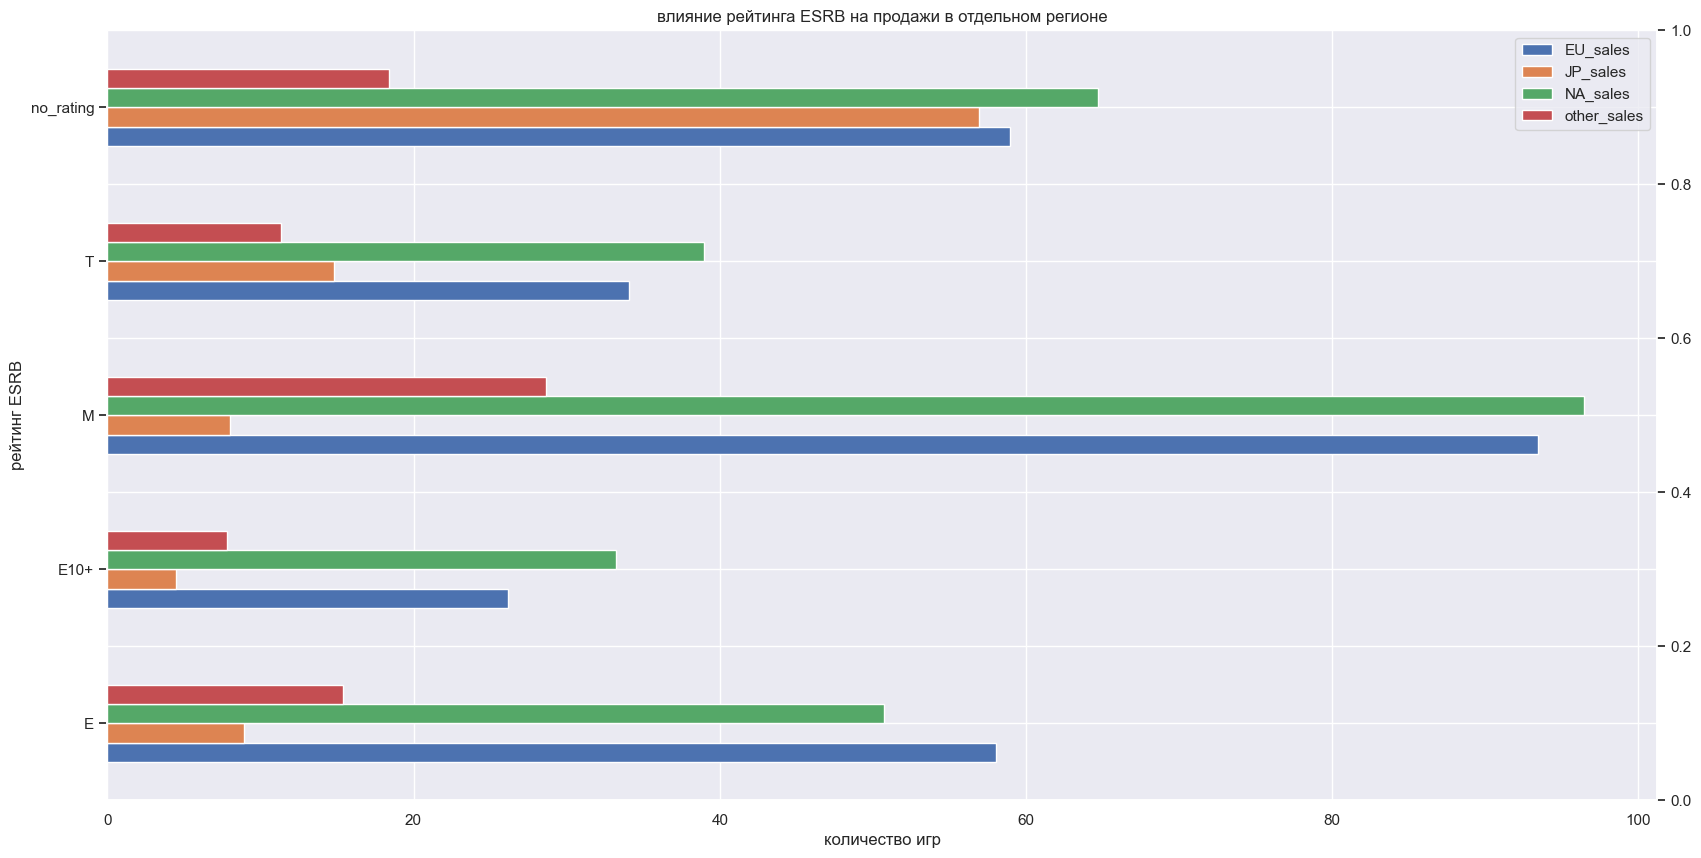

In [78]:
#график влияния рейтинга ESRB на продажи в отдельном регионе
fig, ax = plt.subplots()
(rating_region_rel
 .plot(kind='barh', figsize=(20,10), ax=ax));
plt.title('влияние рейтинга ESRB на продажи в отдельном регионе')
plt.xlabel('количество игр')
plt.ylabel('рейтинг ESRB')
ax2=ax.twinx()

In [79]:
#проверка распределения рейтинга в Японии
relevant_years[['JP_sales','rating']].value_counts().head()

JP_sales  rating   
0.0       no_rating    215
          E            165
          M            161
          E10+         143
          T            132
dtype: int64

**Выводы:** Данные рейтинга ESRB в основном распределены по Северной Америке и немного Европе. Заметно, что в Японии большинство игр не имеет рейтинга ESRB. Однако, все же есть несколько данных с рейтингом E, M, E10+, T. Скорее всего это данные американских игр, которые получили рейтинг ESRB и вошли в японский рынок.

In [80]:
# корреляция рейтинга по регионам
rating_matrix =  ['rating', 'NA_sales','EU_sales', 'JP_sales', 'other_sales']
rat_corrMatrix = games[rating_matrix].corr()
rat_corrMatrix.style.background_gradient(cmap='coolwarm')

,NA_sales,EU_sales,JP_sales,other_sales
NA_sales,1.000000,0.766545,0.451159,0.638478
EU_sales,0.766545,1.000000,0.435892,0.722678
JP_sales,0.451159,0.435892,1.000000,0.291559
other_sales,0.638478,0.722678,0.291559,1.000000


**Вывод по влиянию рейтинга ESRB на продажи в отдельном регионе:**
Влияние рейтинга ESRB замечено только на продажах в Северной Америке и в какой-то мере в Европе. В Японии данные рейтинг не был применен

## Проверка гипотезы

### Проверка платформ Xbox One и PC
**Гипотеза:** 

H₀: средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC.

H₁: средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [81]:
# проверка среднего значения платформы XOne и пользовательского рейтинга
mean_xone = relevant_years.loc[(relevant_years['platform'] == 'XOne') 
          & (relevant_years['user_score'] != -1),
          'user_score'
].mean()
print('Среднее значение платформы XOne и пользовательского рейтинга:', round((mean_xone),2))

Среднее значение платформы XOne и пользовательского рейтинга: 6.59


In [82]:
# проверка среднего значения платформы PC и пользовательского рейтинга
mean_pc = relevant_years.loc[(relevant_years['platform'] == 'PC') 
          & (relevant_years['user_score'] != -1),
          'user_score'
].mean()
print('Среднее значение платформы PC и пользовательского рейтинга:', round((mean_pc),2))

Среднее значение платформы PC и пользовательского рейтинга: 6.3


In [83]:
# проверка стандартного отклонения платформы XOne и пользовательского рейтинга
std_xone = relevant_years.loc[(relevant_years['platform'] == 'XOne') 
          & (relevant_years['user_score'] != -1),
          'user_score'
].std()
print('Стандартное отклонение платформы XOne и пользовательского рейтинга:', round((std_xone),2))

Стандартное отклонение платформы XOne и пользовательского рейтинга: 1.38


In [84]:
# проверка стандартного отклонения платформы PC и пользовательского рейтинга
std_pc = relevant_years.loc[(relevant_years['platform'] == 'PC') 
          & (relevant_years['user_score'] != -1),
          'user_score'
].std()
print('Стандартное отклонение платформы PC и пользовательского рейтинга:', round((std_pc),2))

Стандартное отклонение платформы PC и пользовательского рейтинга: 1.7


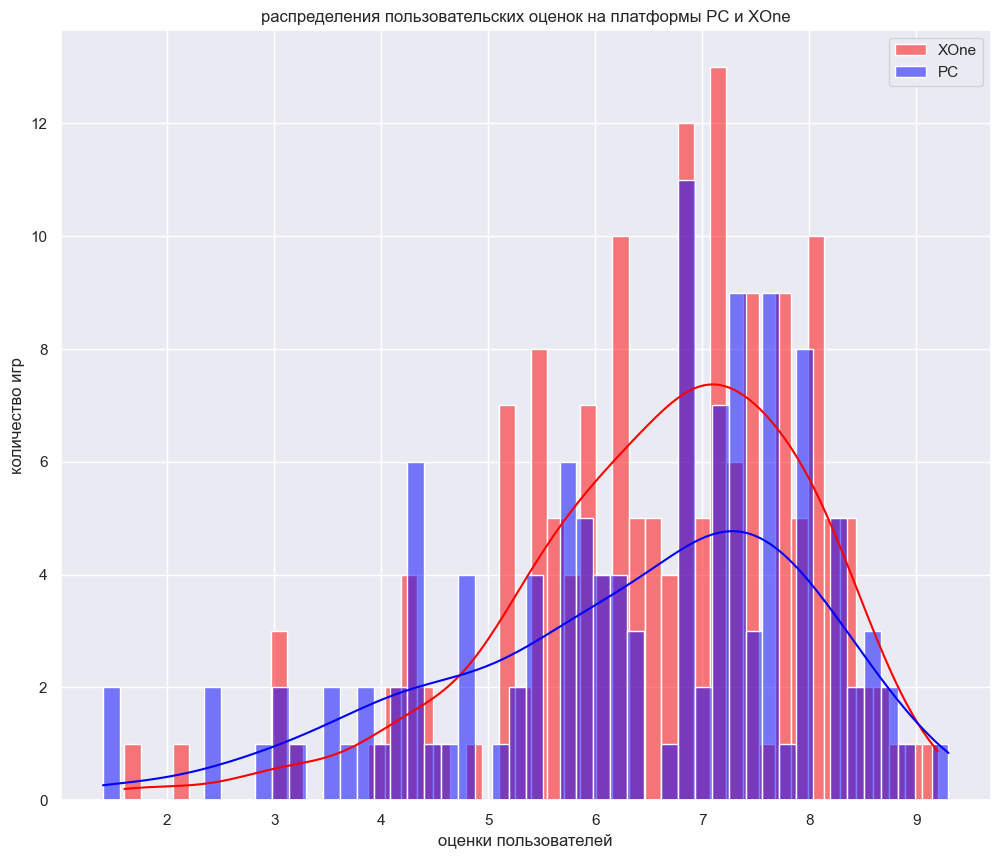

In [85]:
# визуализация распределения пользовательских оценок на платформы
sns.histplot(
    relevant_years.loc[(relevant_years['platform'] == 'XOne') 
          & (relevant_years['user_score'] != -1),
          'user_score'
             ], color ='red', label = 'XOne', kde=True, bins = 50)
sns.histplot(
    relevant_years.loc[(relevant_years['platform'] == 'PC') 
          & (relevant_years['user_score'] != -1),
          'user_score'
             ], color ='blue', label = 'PC', kde=True, bins = 50)
plt.legend()
plt.title('распределения пользовательских оценок на платформы PC и XOne')
plt.xlabel('оценки пользователей')
plt.ylabel('количество игр');

In [86]:
# измерение размера выборки
XOne_user_scores = relevant_years[(relevant_years['platform'] == 'XOne') & ~np.isnan(relevant_years['user_score'])]['user_score']
print('Размер выборки платформы XOne:', len(XOne_user_scores))

Размер выборки платформы XOne: 228


In [87]:
# измерение размера выборки
PC_user_scores = relevant_years[(relevant_years['platform'] == 'PC') & ~np.isnan(relevant_years['user_score'])]['user_score']
print('Размер выборки платформы PC:',len(PC_user_scores))

Размер выборки платформы PC: 151


In [88]:
# поскольку для проверки гипотезы необходимо сравнить среднее двух генеральных совокупностей, был применен st.ttest_ind
# по причине того, что выборки имеют разный размер, был применен equal_var = False 
alpha = 0.05

results = st.ttest_ind(
    XOne_user_scores, 
    PC_user_scores,
    equal_var = False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.26246011727057744
Не получилось отвергнуть нулевую гипотезу


**Выводы по среднему пользовательскому рейтингу платформ:** При проверки гипотезы было выявлено, что вероятность равенства среднего пользовательского рейтинга платформ XOne и PC относительно высокая. Тем самым, нулевая гипотеза не была отвергнута, платформы Xbox One и PC одинаковые.

### Проверка жанров Action и Sports 

**Гипотеза:** 

H₀: Средние пользовательские рейтинги жанров Action и Sports разные.

H₁: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

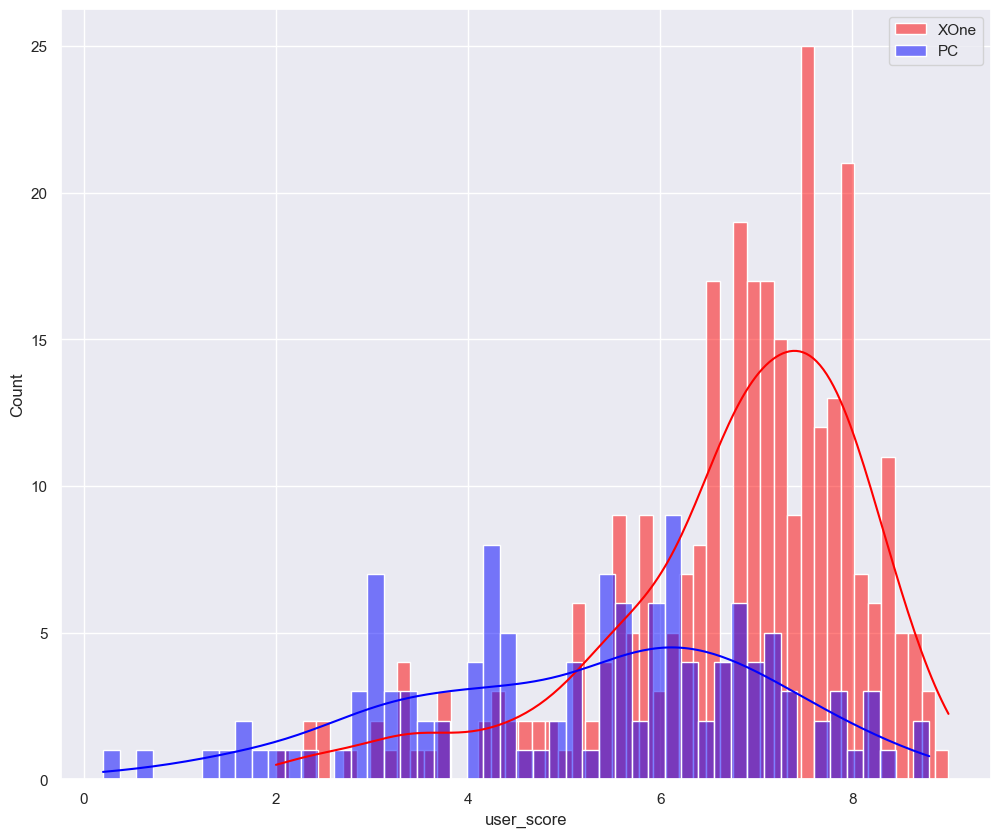

In [89]:
# график распределения пользовательских оценок на жанры
sns.histplot(
    relevant_years.loc[(relevant_years['genre'] == 'Action') 
          & (relevant_years['user_score'] != -1),
          'user_score'
             ], color ='red', label = 'XOne', kde=True, bins = 50)
sns.histplot(
    relevant_years.loc[(relevant_years['genre'] == 'Sports') 
          & (relevant_years['user_score'] != -1),
          'user_score'
             ], color ='blue', label = 'PC', kde=True, bins = 50)
plt.legend()

In [90]:
# измерение размера выборки
action_user_scores = relevant_years[(relevant_years['genre'] == 'Action') & ~np.isnan(relevant_years['user_score'])]['user_score']
print('Размер выборки жанра Action:',len(action_user_scores))

Размер выборки жанра Action: 619


In [91]:
# измерение размера выборки
sports_user_scores = relevant_years[(relevant_years['genre'] == 'Sports') & ~np.isnan(relevant_years['user_score'])]['user_score']
print('Размер выборки жанра Sports:', len(sports_user_scores))

Размер выборки жанра Sports: 161


In [92]:
# поскольку для проверки гипотезы необходимо сравнить среднее двух генеральных совокупностей, был применен st.ttest_ind
# по причине того, что выборки имеют разный размер, был применен equal_var = False 
alpha = 0.05

results = st.ttest_ind(
    action_user_scores, 
    sports_user_scores,
    equal_var = False 
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.829371809684136e-05
Отвергаем нулевую гипотезу


**Выводы по среднему пользовательскому рейтингу жанров:** При проверки гипотезы было выявлено, что вероятность равенства среднего пользовательского рейтинга активного и спортивного жанра на уровни значимости 5%. Тем самым, есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.

## Общий вывод



Анализ продаж компьютерных игр Интернет-магазина показал следующие показатели успешности, на которые стоит обратить внимание: 
- Самой прибыльной платформой является Play Station 4 (PS4). Однако, если выходить на японский рынок, то стоит обратить внимание на их лидера - Nintendo 3DS (3DS).
- Поскольку средняя продолжительность жизни платформ на рынке - 6 лет, PS4 останется актуальным и в 2017 г., чьи продажи в 2016 г. намного выше своих конкурентов.
- Другим важным параметром успешности игр является подбор актуальных жанров игр. Анализ показал, популярностью пользуются игры экшн и шутер. Однако, экшн игры представлены на первых местах в большинстве регионов. Даже в Японии в стране с самым отличительным рынком и где явным лидером являются ролевые игры, экшн игры занимают второе место. Таким образом, жанр экш вполне возможно продлжит быть лидером и в 2017 г.
- Результаты также выявили небольшую зависимость оценок пользователей и критиков на продажи платформ, в частности на PS4. Тем не менее, оценка критиков имела чуть большую значимость на продажи платформ, включая PS4. Однако было замечено, что критики не оценивают многие не популярные или только вышедшие игры.
- В случае рейтинг ESRB, не стоит на него полностью опираться, поскольку он применяется в Северной Америке и имеет небольшую значимость в других регионах.